In [1]:
from environments import ZeroDCleanupEnv
from agents import QAgent
import numpy as np
from collections import defaultdict
import torch
import sys
from tqdm import tqdm

2023-11-22 00:35:22,654	WARNING deprecation.py:50 -- DeprecationWarning: `DirectStepOptimizer` has been deprecated. This will raise an error in the future!


In [2]:
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
print(device)
np.set_printoptions(threshold=sys.maxsize)

cpu


In [3]:
num_agents = 10
agent_ids = [str(i) for i in range(num_agents)]
reward_multiplier = 10

In [4]:
pp = False
verbose = False

In [5]:
num_episodes = 200
verbose_episode = num_episodes - 1
max_steps_per_episode = 1000
state_dim = 4
action_dim = 2

In [6]:
thresholdDepletion = 0.4
thresholdRestoration = 0.0
wasteSpawnProbability = 0.5
appleRespawnProbability = 0.05
dirt_multiplier = 10

area = 150

In [7]:
lr = 0.01
gamma = 0.99
epsilon = 0.5
epsilon_decay = 0.9999
epsilon_min = 0.05
batch_size = 128

In [8]:
env = ZeroDCleanupEnv(agent_ids, 
                      num_agents=num_agents, 
                      area=area, 
                      thresholdDepletion=thresholdDepletion,
                      thresholdRestoration=thresholdRestoration,
                      wasteSpawnProbability=wasteSpawnProbability,
                      appleRespawnProbability=appleRespawnProbability,
                      dirt_multiplier=dirt_multiplier)

agentCoordinator = QAgent(device=device,
                                     num_action_outputs=num_agents,
                                     action_size=action_dim,
                                     state_dim=state_dim,
                                     lr=lr,
                                     gamma=gamma,
                                     epsilon=epsilon,
                                     epsilon_decay=epsilon_decay,
                                     epsilon_min=epsilon_min,
                                     batch_size=batch_size,
                                     q_layers=[
                                         (state_dim, 64),
                                         (64, 32),
                                         (32, 32),
                                         (32, action_dim * num_agents)
                                     ],
                                     verbose=False)

In [9]:
ending_ep_rewards = []
weight_graph = defaultdict(list)

In [10]:
import uuid
import os

if not os.path.exists("results"):
    os.mkdir("results")

test_id = uuid.uuid4()
os.mkdir("results/q_simple_" + str(test_id))
f = open("results/q_simple_" + str(test_id) + "/logs.txt", "x")

In [11]:
for episode in range(num_episodes):
    print(f"========= Episode {episode} =========")
    f.write(f"========= Episode {episode} =========\n")

    states, info = env.reset()
    #states = np.concatenate(list(states.values()), axis=0)
    state = states[agent_ids[0]]

    print(f"info: {info}")
    f.write(f"info: {info}\n")

    for step in tqdm(range(max_steps_per_episode)):
        actions_list = agentCoordinator.act(state)[0]
        actions = {agent_id: actions_list[i] for i, agent_id in enumerate(agent_ids)}
        next_states, rewards, dones, _, info = env.step(actions)
        #next_states = np.concatenate(list(next_states.values()), axis=0)
        next_state = next_states[agent_ids[0]]
        reward = sum(rewards.values())
        #reward_graph.append(reward)
        agentCoordinator.step(state, actions_list, reward, next_state)

        if episode > verbose_episode:
            print(f"========= Step {step} =========")
            print(f"info: {info}")
            f.write(f"========= Step {step} =========\n")
            f.write(f"info: {info}\n")

        state = next_state

        if dones["__all__"]:
            break 

    ending_reward = info["total_apple_consumed"]

    print(f"ending reward: {ending_reward}")
    #print(f"reward graph: {reward_graph}")
    print(f"========= End of Episode {episode} =========")
    
    f.write(f"ending reward: {ending_reward}\n")
    #f.write(f"reward graph: {reward_graph}\n")
    f.write(f"========= End of Episode {episode} =========\n")

    ending_ep_rewards.append(ending_reward)

    if ending_reward > 5000 and ending_ep_rewards[-2] > 5000 and agentCoordinator.epsilon < 0.1:
        break

    

#torch.save(agentCoordinator.q_network.state_dict(), "results/q_simple_" + str(test_id) + "/q_network.pt")

        

========= Episode 0 =========
info: {'total_apple_consumed': 0, 'step_apple_consumed': 0, 'apple': 0, 'dirt': 78, 'picker': 0, 'cleaner': 0, 'total_reward_by_agent': {'5': 0, '7': 0, '2': 0, '8': 0, '6': 0, '1': 0, '4': 0, '3': 0, '9': 0, '0': 0}}


 13%|█▎        | 129/1000 [00:00<00:00, 1162.29it/s]

100%|█████████▉| 999/1000 [00:02<00:00, 431.13it/s] 


ending reward: 2652
========= End of Episode 0 =========
========= Episode 1 =========
info: {'total_apple_consumed': 0, 'step_apple_consumed': 0, 'apple': 0, 'dirt': 78, 'picker': 0, 'cleaner': 0, 'total_reward_by_agent': {'5': 0, '7': 0, '2': 0, '8': 0, '6': 0, '1': 0, '4': 0, '3': 0, '9': 0, '0': 0}}


100%|█████████▉| 999/1000 [00:02<00:00, 383.04it/s]


ending reward: 2621
========= End of Episode 1 =========
========= Episode 2 =========
info: {'total_apple_consumed': 0, 'step_apple_consumed': 0, 'apple': 0, 'dirt': 78, 'picker': 0, 'cleaner': 0, 'total_reward_by_agent': {'5': 0, '7': 0, '2': 0, '8': 0, '6': 0, '1': 0, '4': 0, '3': 0, '9': 0, '0': 0}}


100%|█████████▉| 999/1000 [00:02<00:00, 366.11it/s]


ending reward: 2744
========= End of Episode 2 =========
========= Episode 3 =========
info: {'total_apple_consumed': 0, 'step_apple_consumed': 0, 'apple': 0, 'dirt': 78, 'picker': 0, 'cleaner': 0, 'total_reward_by_agent': {'5': 0, '7': 0, '2': 0, '8': 0, '6': 0, '1': 0, '4': 0, '3': 0, '9': 0, '0': 0}}


100%|█████████▉| 999/1000 [00:01<00:00, 500.34it/s]


ending reward: 2657
========= End of Episode 3 =========
========= Episode 4 =========
info: {'total_apple_consumed': 0, 'step_apple_consumed': 0, 'apple': 0, 'dirt': 78, 'picker': 0, 'cleaner': 0, 'total_reward_by_agent': {'5': 0, '7': 0, '2': 0, '8': 0, '6': 0, '1': 0, '4': 0, '3': 0, '9': 0, '0': 0}}


100%|█████████▉| 999/1000 [00:01<00:00, 529.73it/s]


ending reward: 2696
========= End of Episode 4 =========
========= Episode 5 =========
info: {'total_apple_consumed': 0, 'step_apple_consumed': 0, 'apple': 0, 'dirt': 78, 'picker': 0, 'cleaner': 0, 'total_reward_by_agent': {'5': 0, '7': 0, '2': 0, '8': 0, '6': 0, '1': 0, '4': 0, '3': 0, '9': 0, '0': 0}}


100%|█████████▉| 999/1000 [00:01<00:00, 521.83it/s]


ending reward: 2771
========= End of Episode 5 =========
========= Episode 6 =========
info: {'total_apple_consumed': 0, 'step_apple_consumed': 0, 'apple': 0, 'dirt': 78, 'picker': 0, 'cleaner': 0, 'total_reward_by_agent': {'5': 0, '7': 0, '2': 0, '8': 0, '6': 0, '1': 0, '4': 0, '3': 0, '9': 0, '0': 0}}


100%|█████████▉| 999/1000 [00:02<00:00, 389.25it/s]


ending reward: 2788
========= End of Episode 6 =========
========= Episode 7 =========
info: {'total_apple_consumed': 0, 'step_apple_consumed': 0, 'apple': 0, 'dirt': 78, 'picker': 0, 'cleaner': 0, 'total_reward_by_agent': {'5': 0, '7': 0, '2': 0, '8': 0, '6': 0, '1': 0, '4': 0, '3': 0, '9': 0, '0': 0}}


100%|█████████▉| 999/1000 [00:01<00:00, 567.54it/s]


ending reward: 2679
========= End of Episode 7 =========
========= Episode 8 =========
info: {'total_apple_consumed': 0, 'step_apple_consumed': 0, 'apple': 0, 'dirt': 78, 'picker': 0, 'cleaner': 0, 'total_reward_by_agent': {'5': 0, '7': 0, '2': 0, '8': 0, '6': 0, '1': 0, '4': 0, '3': 0, '9': 0, '0': 0}}


100%|█████████▉| 999/1000 [00:02<00:00, 392.65it/s]


ending reward: 2615
========= End of Episode 8 =========
========= Episode 9 =========
info: {'total_apple_consumed': 0, 'step_apple_consumed': 0, 'apple': 0, 'dirt': 78, 'picker': 0, 'cleaner': 0, 'total_reward_by_agent': {'5': 0, '7': 0, '2': 0, '8': 0, '6': 0, '1': 0, '4': 0, '3': 0, '9': 0, '0': 0}}


100%|█████████▉| 999/1000 [00:02<00:00, 403.27it/s]


ending reward: 2778
========= End of Episode 9 =========
========= Episode 10 =========
info: {'total_apple_consumed': 0, 'step_apple_consumed': 0, 'apple': 0, 'dirt': 78, 'picker': 0, 'cleaner': 0, 'total_reward_by_agent': {'5': 0, '7': 0, '2': 0, '8': 0, '6': 0, '1': 0, '4': 0, '3': 0, '9': 0, '0': 0}}


100%|█████████▉| 999/1000 [00:02<00:00, 426.06it/s]


ending reward: 2700
========= End of Episode 10 =========
========= Episode 11 =========
info: {'total_apple_consumed': 0, 'step_apple_consumed': 0, 'apple': 0, 'dirt': 78, 'picker': 0, 'cleaner': 0, 'total_reward_by_agent': {'5': 0, '7': 0, '2': 0, '8': 0, '6': 0, '1': 0, '4': 0, '3': 0, '9': 0, '0': 0}}


100%|█████████▉| 999/1000 [00:02<00:00, 456.33it/s]


ending reward: 2739
========= End of Episode 11 =========
========= Episode 12 =========
info: {'total_apple_consumed': 0, 'step_apple_consumed': 0, 'apple': 0, 'dirt': 78, 'picker': 0, 'cleaner': 0, 'total_reward_by_agent': {'5': 0, '7': 0, '2': 0, '8': 0, '6': 0, '1': 0, '4': 0, '3': 0, '9': 0, '0': 0}}


100%|█████████▉| 999/1000 [00:02<00:00, 469.83it/s]


ending reward: 2683
========= End of Episode 12 =========
========= Episode 13 =========
info: {'total_apple_consumed': 0, 'step_apple_consumed': 0, 'apple': 0, 'dirt': 78, 'picker': 0, 'cleaner': 0, 'total_reward_by_agent': {'5': 0, '7': 0, '2': 0, '8': 0, '6': 0, '1': 0, '4': 0, '3': 0, '9': 0, '0': 0}}


100%|█████████▉| 999/1000 [00:01<00:00, 579.61it/s]


ending reward: 2708
========= End of Episode 13 =========
========= Episode 14 =========
info: {'total_apple_consumed': 0, 'step_apple_consumed': 0, 'apple': 0, 'dirt': 78, 'picker': 0, 'cleaner': 0, 'total_reward_by_agent': {'5': 0, '7': 0, '2': 0, '8': 0, '6': 0, '1': 0, '4': 0, '3': 0, '9': 0, '0': 0}}


100%|█████████▉| 999/1000 [00:01<00:00, 578.39it/s]


ending reward: 2676
========= End of Episode 14 =========
========= Episode 15 =========
info: {'total_apple_consumed': 0, 'step_apple_consumed': 0, 'apple': 0, 'dirt': 78, 'picker': 0, 'cleaner': 0, 'total_reward_by_agent': {'5': 0, '7': 0, '2': 0, '8': 0, '6': 0, '1': 0, '4': 0, '3': 0, '9': 0, '0': 0}}


100%|█████████▉| 999/1000 [00:01<00:00, 554.01it/s]


ending reward: 2717
========= End of Episode 15 =========
========= Episode 16 =========
info: {'total_apple_consumed': 0, 'step_apple_consumed': 0, 'apple': 0, 'dirt': 78, 'picker': 0, 'cleaner': 0, 'total_reward_by_agent': {'5': 0, '7': 0, '2': 0, '8': 0, '6': 0, '1': 0, '4': 0, '3': 0, '9': 0, '0': 0}}


100%|█████████▉| 999/1000 [00:02<00:00, 431.67it/s]


ending reward: 2582
========= End of Episode 16 =========
========= Episode 17 =========
info: {'total_apple_consumed': 0, 'step_apple_consumed': 0, 'apple': 0, 'dirt': 78, 'picker': 0, 'cleaner': 0, 'total_reward_by_agent': {'5': 0, '7': 0, '2': 0, '8': 0, '6': 0, '1': 0, '4': 0, '3': 0, '9': 0, '0': 0}}


100%|█████████▉| 999/1000 [00:02<00:00, 477.09it/s]


ending reward: 2662
========= End of Episode 17 =========
========= Episode 18 =========
info: {'total_apple_consumed': 0, 'step_apple_consumed': 0, 'apple': 0, 'dirt': 78, 'picker': 0, 'cleaner': 0, 'total_reward_by_agent': {'5': 0, '7': 0, '2': 0, '8': 0, '6': 0, '1': 0, '4': 0, '3': 0, '9': 0, '0': 0}}


100%|█████████▉| 999/1000 [00:02<00:00, 481.19it/s]


ending reward: 2628
========= End of Episode 18 =========
========= Episode 19 =========
info: {'total_apple_consumed': 0, 'step_apple_consumed': 0, 'apple': 0, 'dirt': 78, 'picker': 0, 'cleaner': 0, 'total_reward_by_agent': {'5': 0, '7': 0, '2': 0, '8': 0, '6': 0, '1': 0, '4': 0, '3': 0, '9': 0, '0': 0}}


100%|█████████▉| 999/1000 [00:01<00:00, 529.39it/s]


ending reward: 2603
========= End of Episode 19 =========
========= Episode 20 =========
info: {'total_apple_consumed': 0, 'step_apple_consumed': 0, 'apple': 0, 'dirt': 78, 'picker': 0, 'cleaner': 0, 'total_reward_by_agent': {'5': 0, '7': 0, '2': 0, '8': 0, '6': 0, '1': 0, '4': 0, '3': 0, '9': 0, '0': 0}}


100%|█████████▉| 999/1000 [00:02<00:00, 446.11it/s]


ending reward: 2682
========= End of Episode 20 =========
========= Episode 21 =========
info: {'total_apple_consumed': 0, 'step_apple_consumed': 0, 'apple': 0, 'dirt': 78, 'picker': 0, 'cleaner': 0, 'total_reward_by_agent': {'5': 0, '7': 0, '2': 0, '8': 0, '6': 0, '1': 0, '4': 0, '3': 0, '9': 0, '0': 0}}


100%|█████████▉| 999/1000 [00:02<00:00, 438.75it/s]


ending reward: 2650
========= End of Episode 21 =========
========= Episode 22 =========
info: {'total_apple_consumed': 0, 'step_apple_consumed': 0, 'apple': 0, 'dirt': 78, 'picker': 0, 'cleaner': 0, 'total_reward_by_agent': {'5': 0, '7': 0, '2': 0, '8': 0, '6': 0, '1': 0, '4': 0, '3': 0, '9': 0, '0': 0}}


100%|█████████▉| 999/1000 [00:02<00:00, 461.22it/s]


ending reward: 2690
========= End of Episode 22 =========
========= Episode 23 =========
info: {'total_apple_consumed': 0, 'step_apple_consumed': 0, 'apple': 0, 'dirt': 78, 'picker': 0, 'cleaner': 0, 'total_reward_by_agent': {'5': 0, '7': 0, '2': 0, '8': 0, '6': 0, '1': 0, '4': 0, '3': 0, '9': 0, '0': 0}}


100%|█████████▉| 999/1000 [00:01<00:00, 550.78it/s]


ending reward: 2715
========= End of Episode 23 =========
========= Episode 24 =========
info: {'total_apple_consumed': 0, 'step_apple_consumed': 0, 'apple': 0, 'dirt': 78, 'picker': 0, 'cleaner': 0, 'total_reward_by_agent': {'5': 0, '7': 0, '2': 0, '8': 0, '6': 0, '1': 0, '4': 0, '3': 0, '9': 0, '0': 0}}


100%|█████████▉| 999/1000 [00:01<00:00, 584.80it/s]


ending reward: 2739
========= End of Episode 24 =========
========= Episode 25 =========
info: {'total_apple_consumed': 0, 'step_apple_consumed': 0, 'apple': 0, 'dirt': 78, 'picker': 0, 'cleaner': 0, 'total_reward_by_agent': {'5': 0, '7': 0, '2': 0, '8': 0, '6': 0, '1': 0, '4': 0, '3': 0, '9': 0, '0': 0}}


100%|█████████▉| 999/1000 [00:01<00:00, 568.27it/s]


ending reward: 2757
========= End of Episode 25 =========
========= Episode 26 =========
info: {'total_apple_consumed': 0, 'step_apple_consumed': 0, 'apple': 0, 'dirt': 78, 'picker': 0, 'cleaner': 0, 'total_reward_by_agent': {'5': 0, '7': 0, '2': 0, '8': 0, '6': 0, '1': 0, '4': 0, '3': 0, '9': 0, '0': 0}}


100%|█████████▉| 999/1000 [00:01<00:00, 586.28it/s]


ending reward: 2753
========= End of Episode 26 =========
========= Episode 27 =========
info: {'total_apple_consumed': 0, 'step_apple_consumed': 0, 'apple': 0, 'dirt': 78, 'picker': 0, 'cleaner': 0, 'total_reward_by_agent': {'5': 0, '7': 0, '2': 0, '8': 0, '6': 0, '1': 0, '4': 0, '3': 0, '9': 0, '0': 0}}


100%|█████████▉| 999/1000 [00:02<00:00, 457.52it/s]


ending reward: 2729
========= End of Episode 27 =========
========= Episode 28 =========
info: {'total_apple_consumed': 0, 'step_apple_consumed': 0, 'apple': 0, 'dirt': 78, 'picker': 0, 'cleaner': 0, 'total_reward_by_agent': {'5': 0, '7': 0, '2': 0, '8': 0, '6': 0, '1': 0, '4': 0, '3': 0, '9': 0, '0': 0}}


100%|█████████▉| 999/1000 [00:01<00:00, 526.47it/s]


ending reward: 2635
========= End of Episode 28 =========
========= Episode 29 =========
info: {'total_apple_consumed': 0, 'step_apple_consumed': 0, 'apple': 0, 'dirt': 78, 'picker': 0, 'cleaner': 0, 'total_reward_by_agent': {'5': 0, '7': 0, '2': 0, '8': 0, '6': 0, '1': 0, '4': 0, '3': 0, '9': 0, '0': 0}}


100%|█████████▉| 999/1000 [00:01<00:00, 503.41it/s]


ending reward: 2729
========= End of Episode 29 =========
========= Episode 30 =========
info: {'total_apple_consumed': 0, 'step_apple_consumed': 0, 'apple': 0, 'dirt': 78, 'picker': 0, 'cleaner': 0, 'total_reward_by_agent': {'5': 0, '7': 0, '2': 0, '8': 0, '6': 0, '1': 0, '4': 0, '3': 0, '9': 0, '0': 0}}


100%|█████████▉| 999/1000 [00:01<00:00, 511.36it/s]


ending reward: 2657
========= End of Episode 30 =========
========= Episode 31 =========
info: {'total_apple_consumed': 0, 'step_apple_consumed': 0, 'apple': 0, 'dirt': 78, 'picker': 0, 'cleaner': 0, 'total_reward_by_agent': {'5': 0, '7': 0, '2': 0, '8': 0, '6': 0, '1': 0, '4': 0, '3': 0, '9': 0, '0': 0}}


100%|█████████▉| 999/1000 [00:02<00:00, 443.72it/s]


ending reward: 2761
========= End of Episode 31 =========
========= Episode 32 =========
info: {'total_apple_consumed': 0, 'step_apple_consumed': 0, 'apple': 0, 'dirt': 78, 'picker': 0, 'cleaner': 0, 'total_reward_by_agent': {'5': 0, '7': 0, '2': 0, '8': 0, '6': 0, '1': 0, '4': 0, '3': 0, '9': 0, '0': 0}}


100%|█████████▉| 999/1000 [00:02<00:00, 497.36it/s]


ending reward: 2681
========= End of Episode 32 =========
========= Episode 33 =========
info: {'total_apple_consumed': 0, 'step_apple_consumed': 0, 'apple': 0, 'dirt': 78, 'picker': 0, 'cleaner': 0, 'total_reward_by_agent': {'5': 0, '7': 0, '2': 0, '8': 0, '6': 0, '1': 0, '4': 0, '3': 0, '9': 0, '0': 0}}


100%|█████████▉| 999/1000 [00:01<00:00, 511.51it/s]


ending reward: 2701
========= End of Episode 33 =========
========= Episode 34 =========
info: {'total_apple_consumed': 0, 'step_apple_consumed': 0, 'apple': 0, 'dirt': 78, 'picker': 0, 'cleaner': 0, 'total_reward_by_agent': {'5': 0, '7': 0, '2': 0, '8': 0, '6': 0, '1': 0, '4': 0, '3': 0, '9': 0, '0': 0}}


100%|█████████▉| 999/1000 [00:02<00:00, 428.15it/s]


ending reward: 2738
========= End of Episode 34 =========
========= Episode 35 =========
info: {'total_apple_consumed': 0, 'step_apple_consumed': 0, 'apple': 0, 'dirt': 78, 'picker': 0, 'cleaner': 0, 'total_reward_by_agent': {'5': 0, '7': 0, '2': 0, '8': 0, '6': 0, '1': 0, '4': 0, '3': 0, '9': 0, '0': 0}}


100%|█████████▉| 999/1000 [00:02<00:00, 465.94it/s]


ending reward: 2732
========= End of Episode 35 =========
========= Episode 36 =========
info: {'total_apple_consumed': 0, 'step_apple_consumed': 0, 'apple': 0, 'dirt': 78, 'picker': 0, 'cleaner': 0, 'total_reward_by_agent': {'5': 0, '7': 0, '2': 0, '8': 0, '6': 0, '1': 0, '4': 0, '3': 0, '9': 0, '0': 0}}


100%|█████████▉| 999/1000 [00:02<00:00, 427.96it/s]


ending reward: 2570
========= End of Episode 36 =========
========= Episode 37 =========
info: {'total_apple_consumed': 0, 'step_apple_consumed': 0, 'apple': 0, 'dirt': 78, 'picker': 0, 'cleaner': 0, 'total_reward_by_agent': {'5': 0, '7': 0, '2': 0, '8': 0, '6': 0, '1': 0, '4': 0, '3': 0, '9': 0, '0': 0}}


100%|█████████▉| 999/1000 [00:02<00:00, 479.47it/s]


ending reward: 2790
========= End of Episode 37 =========
========= Episode 38 =========
info: {'total_apple_consumed': 0, 'step_apple_consumed': 0, 'apple': 0, 'dirt': 78, 'picker': 0, 'cleaner': 0, 'total_reward_by_agent': {'5': 0, '7': 0, '2': 0, '8': 0, '6': 0, '1': 0, '4': 0, '3': 0, '9': 0, '0': 0}}


100%|█████████▉| 999/1000 [00:01<00:00, 526.60it/s]


ending reward: 2724
========= End of Episode 38 =========
========= Episode 39 =========
info: {'total_apple_consumed': 0, 'step_apple_consumed': 0, 'apple': 0, 'dirt': 78, 'picker': 0, 'cleaner': 0, 'total_reward_by_agent': {'5': 0, '7': 0, '2': 0, '8': 0, '6': 0, '1': 0, '4': 0, '3': 0, '9': 0, '0': 0}}


100%|█████████▉| 999/1000 [00:02<00:00, 403.90it/s]


ending reward: 2746
========= End of Episode 39 =========
========= Episode 40 =========
info: {'total_apple_consumed': 0, 'step_apple_consumed': 0, 'apple': 0, 'dirt': 78, 'picker': 0, 'cleaner': 0, 'total_reward_by_agent': {'5': 0, '7': 0, '2': 0, '8': 0, '6': 0, '1': 0, '4': 0, '3': 0, '9': 0, '0': 0}}


100%|█████████▉| 999/1000 [00:02<00:00, 347.69it/s]


ending reward: 2707
========= End of Episode 40 =========
========= Episode 41 =========
info: {'total_apple_consumed': 0, 'step_apple_consumed': 0, 'apple': 0, 'dirt': 78, 'picker': 0, 'cleaner': 0, 'total_reward_by_agent': {'5': 0, '7': 0, '2': 0, '8': 0, '6': 0, '1': 0, '4': 0, '3': 0, '9': 0, '0': 0}}


100%|█████████▉| 999/1000 [00:02<00:00, 379.16it/s]


ending reward: 2699
========= End of Episode 41 =========
========= Episode 42 =========
info: {'total_apple_consumed': 0, 'step_apple_consumed': 0, 'apple': 0, 'dirt': 78, 'picker': 0, 'cleaner': 0, 'total_reward_by_agent': {'5': 0, '7': 0, '2': 0, '8': 0, '6': 0, '1': 0, '4': 0, '3': 0, '9': 0, '0': 0}}


100%|█████████▉| 999/1000 [00:02<00:00, 399.85it/s]


ending reward: 2636
========= End of Episode 42 =========
========= Episode 43 =========
info: {'total_apple_consumed': 0, 'step_apple_consumed': 0, 'apple': 0, 'dirt': 78, 'picker': 0, 'cleaner': 0, 'total_reward_by_agent': {'5': 0, '7': 0, '2': 0, '8': 0, '6': 0, '1': 0, '4': 0, '3': 0, '9': 0, '0': 0}}


100%|█████████▉| 999/1000 [00:02<00:00, 364.63it/s]


ending reward: 2616
========= End of Episode 43 =========
========= Episode 44 =========
info: {'total_apple_consumed': 0, 'step_apple_consumed': 0, 'apple': 0, 'dirt': 78, 'picker': 0, 'cleaner': 0, 'total_reward_by_agent': {'5': 0, '7': 0, '2': 0, '8': 0, '6': 0, '1': 0, '4': 0, '3': 0, '9': 0, '0': 0}}


100%|█████████▉| 999/1000 [00:02<00:00, 404.85it/s]


ending reward: 2625
========= End of Episode 44 =========
========= Episode 45 =========
info: {'total_apple_consumed': 0, 'step_apple_consumed': 0, 'apple': 0, 'dirt': 78, 'picker': 0, 'cleaner': 0, 'total_reward_by_agent': {'5': 0, '7': 0, '2': 0, '8': 0, '6': 0, '1': 0, '4': 0, '3': 0, '9': 0, '0': 0}}


100%|█████████▉| 999/1000 [00:02<00:00, 426.61it/s]


ending reward: 2661
========= End of Episode 45 =========
========= Episode 46 =========
info: {'total_apple_consumed': 0, 'step_apple_consumed': 0, 'apple': 0, 'dirt': 78, 'picker': 0, 'cleaner': 0, 'total_reward_by_agent': {'5': 0, '7': 0, '2': 0, '8': 0, '6': 0, '1': 0, '4': 0, '3': 0, '9': 0, '0': 0}}


100%|█████████▉| 999/1000 [00:01<00:00, 529.96it/s]


ending reward: 2716
========= End of Episode 46 =========
========= Episode 47 =========
info: {'total_apple_consumed': 0, 'step_apple_consumed': 0, 'apple': 0, 'dirt': 78, 'picker': 0, 'cleaner': 0, 'total_reward_by_agent': {'5': 0, '7': 0, '2': 0, '8': 0, '6': 0, '1': 0, '4': 0, '3': 0, '9': 0, '0': 0}}


100%|█████████▉| 999/1000 [00:02<00:00, 484.68it/s]


ending reward: 2719
========= End of Episode 47 =========
========= Episode 48 =========
info: {'total_apple_consumed': 0, 'step_apple_consumed': 0, 'apple': 0, 'dirt': 78, 'picker': 0, 'cleaner': 0, 'total_reward_by_agent': {'5': 0, '7': 0, '2': 0, '8': 0, '6': 0, '1': 0, '4': 0, '3': 0, '9': 0, '0': 0}}


100%|█████████▉| 999/1000 [00:01<00:00, 534.45it/s]


ending reward: 2669
========= End of Episode 48 =========
========= Episode 49 =========
info: {'total_apple_consumed': 0, 'step_apple_consumed': 0, 'apple': 0, 'dirt': 78, 'picker': 0, 'cleaner': 0, 'total_reward_by_agent': {'5': 0, '7': 0, '2': 0, '8': 0, '6': 0, '1': 0, '4': 0, '3': 0, '9': 0, '0': 0}}


100%|█████████▉| 999/1000 [00:02<00:00, 439.66it/s]


ending reward: 2727
========= End of Episode 49 =========
========= Episode 50 =========
info: {'total_apple_consumed': 0, 'step_apple_consumed': 0, 'apple': 0, 'dirt': 78, 'picker': 0, 'cleaner': 0, 'total_reward_by_agent': {'5': 0, '7': 0, '2': 0, '8': 0, '6': 0, '1': 0, '4': 0, '3': 0, '9': 0, '0': 0}}


100%|█████████▉| 999/1000 [00:02<00:00, 436.97it/s]


ending reward: 2769
========= End of Episode 50 =========
========= Episode 51 =========
info: {'total_apple_consumed': 0, 'step_apple_consumed': 0, 'apple': 0, 'dirt': 78, 'picker': 0, 'cleaner': 0, 'total_reward_by_agent': {'5': 0, '7': 0, '2': 0, '8': 0, '6': 0, '1': 0, '4': 0, '3': 0, '9': 0, '0': 0}}


100%|█████████▉| 999/1000 [00:02<00:00, 454.56it/s]


ending reward: 2716
========= End of Episode 51 =========
========= Episode 52 =========
info: {'total_apple_consumed': 0, 'step_apple_consumed': 0, 'apple': 0, 'dirt': 78, 'picker': 0, 'cleaner': 0, 'total_reward_by_agent': {'5': 0, '7': 0, '2': 0, '8': 0, '6': 0, '1': 0, '4': 0, '3': 0, '9': 0, '0': 0}}


100%|█████████▉| 999/1000 [00:01<00:00, 528.36it/s]


ending reward: 2769
========= End of Episode 52 =========
========= Episode 53 =========
info: {'total_apple_consumed': 0, 'step_apple_consumed': 0, 'apple': 0, 'dirt': 78, 'picker': 0, 'cleaner': 0, 'total_reward_by_agent': {'5': 0, '7': 0, '2': 0, '8': 0, '6': 0, '1': 0, '4': 0, '3': 0, '9': 0, '0': 0}}


100%|█████████▉| 999/1000 [00:02<00:00, 481.03it/s]


ending reward: 2618
========= End of Episode 53 =========
========= Episode 54 =========
info: {'total_apple_consumed': 0, 'step_apple_consumed': 0, 'apple': 0, 'dirt': 78, 'picker': 0, 'cleaner': 0, 'total_reward_by_agent': {'5': 0, '7': 0, '2': 0, '8': 0, '6': 0, '1': 0, '4': 0, '3': 0, '9': 0, '0': 0}}


100%|█████████▉| 999/1000 [00:02<00:00, 476.43it/s]


ending reward: 2643
========= End of Episode 54 =========
========= Episode 55 =========
info: {'total_apple_consumed': 0, 'step_apple_consumed': 0, 'apple': 0, 'dirt': 78, 'picker': 0, 'cleaner': 0, 'total_reward_by_agent': {'5': 0, '7': 0, '2': 0, '8': 0, '6': 0, '1': 0, '4': 0, '3': 0, '9': 0, '0': 0}}


100%|█████████▉| 999/1000 [00:02<00:00, 465.16it/s]


ending reward: 2640
========= End of Episode 55 =========
========= Episode 56 =========
info: {'total_apple_consumed': 0, 'step_apple_consumed': 0, 'apple': 0, 'dirt': 78, 'picker': 0, 'cleaner': 0, 'total_reward_by_agent': {'5': 0, '7': 0, '2': 0, '8': 0, '6': 0, '1': 0, '4': 0, '3': 0, '9': 0, '0': 0}}


100%|█████████▉| 999/1000 [00:01<00:00, 535.70it/s]


ending reward: 2659
========= End of Episode 56 =========
========= Episode 57 =========
info: {'total_apple_consumed': 0, 'step_apple_consumed': 0, 'apple': 0, 'dirt': 78, 'picker': 0, 'cleaner': 0, 'total_reward_by_agent': {'5': 0, '7': 0, '2': 0, '8': 0, '6': 0, '1': 0, '4': 0, '3': 0, '9': 0, '0': 0}}


100%|█████████▉| 999/1000 [00:01<00:00, 514.32it/s]


ending reward: 2673
========= End of Episode 57 =========
========= Episode 58 =========
info: {'total_apple_consumed': 0, 'step_apple_consumed': 0, 'apple': 0, 'dirt': 78, 'picker': 0, 'cleaner': 0, 'total_reward_by_agent': {'5': 0, '7': 0, '2': 0, '8': 0, '6': 0, '1': 0, '4': 0, '3': 0, '9': 0, '0': 0}}


100%|█████████▉| 999/1000 [00:02<00:00, 458.20it/s]


ending reward: 2620
========= End of Episode 58 =========
========= Episode 59 =========
info: {'total_apple_consumed': 0, 'step_apple_consumed': 0, 'apple': 0, 'dirt': 78, 'picker': 0, 'cleaner': 0, 'total_reward_by_agent': {'5': 0, '7': 0, '2': 0, '8': 0, '6': 0, '1': 0, '4': 0, '3': 0, '9': 0, '0': 0}}


100%|█████████▉| 999/1000 [00:02<00:00, 466.23it/s]


ending reward: 2668
========= End of Episode 59 =========
========= Episode 60 =========
info: {'total_apple_consumed': 0, 'step_apple_consumed': 0, 'apple': 0, 'dirt': 78, 'picker': 0, 'cleaner': 0, 'total_reward_by_agent': {'5': 0, '7': 0, '2': 0, '8': 0, '6': 0, '1': 0, '4': 0, '3': 0, '9': 0, '0': 0}}


100%|█████████▉| 999/1000 [00:02<00:00, 477.40it/s]


ending reward: 2744
========= End of Episode 60 =========
========= Episode 61 =========
info: {'total_apple_consumed': 0, 'step_apple_consumed': 0, 'apple': 0, 'dirt': 78, 'picker': 0, 'cleaner': 0, 'total_reward_by_agent': {'5': 0, '7': 0, '2': 0, '8': 0, '6': 0, '1': 0, '4': 0, '3': 0, '9': 0, '0': 0}}


100%|█████████▉| 999/1000 [00:02<00:00, 449.80it/s]


ending reward: 2681
========= End of Episode 61 =========
========= Episode 62 =========
info: {'total_apple_consumed': 0, 'step_apple_consumed': 0, 'apple': 0, 'dirt': 78, 'picker': 0, 'cleaner': 0, 'total_reward_by_agent': {'5': 0, '7': 0, '2': 0, '8': 0, '6': 0, '1': 0, '4': 0, '3': 0, '9': 0, '0': 0}}


100%|█████████▉| 999/1000 [00:01<00:00, 509.22it/s]


ending reward: 2798
========= End of Episode 62 =========
========= Episode 63 =========
info: {'total_apple_consumed': 0, 'step_apple_consumed': 0, 'apple': 0, 'dirt': 78, 'picker': 0, 'cleaner': 0, 'total_reward_by_agent': {'5': 0, '7': 0, '2': 0, '8': 0, '6': 0, '1': 0, '4': 0, '3': 0, '9': 0, '0': 0}}


100%|█████████▉| 999/1000 [00:02<00:00, 492.61it/s]


ending reward: 2620
========= End of Episode 63 =========
========= Episode 64 =========
info: {'total_apple_consumed': 0, 'step_apple_consumed': 0, 'apple': 0, 'dirt': 78, 'picker': 0, 'cleaner': 0, 'total_reward_by_agent': {'5': 0, '7': 0, '2': 0, '8': 0, '6': 0, '1': 0, '4': 0, '3': 0, '9': 0, '0': 0}}


100%|█████████▉| 999/1000 [00:02<00:00, 413.07it/s]


ending reward: 2700
========= End of Episode 64 =========
========= Episode 65 =========
info: {'total_apple_consumed': 0, 'step_apple_consumed': 0, 'apple': 0, 'dirt': 78, 'picker': 0, 'cleaner': 0, 'total_reward_by_agent': {'5': 0, '7': 0, '2': 0, '8': 0, '6': 0, '1': 0, '4': 0, '3': 0, '9': 0, '0': 0}}


100%|█████████▉| 999/1000 [00:02<00:00, 402.57it/s]


ending reward: 2727
========= End of Episode 65 =========
========= Episode 66 =========
info: {'total_apple_consumed': 0, 'step_apple_consumed': 0, 'apple': 0, 'dirt': 78, 'picker': 0, 'cleaner': 0, 'total_reward_by_agent': {'5': 0, '7': 0, '2': 0, '8': 0, '6': 0, '1': 0, '4': 0, '3': 0, '9': 0, '0': 0}}


100%|█████████▉| 999/1000 [00:02<00:00, 401.29it/s]


ending reward: 2686
========= End of Episode 66 =========
========= Episode 67 =========
info: {'total_apple_consumed': 0, 'step_apple_consumed': 0, 'apple': 0, 'dirt': 78, 'picker': 0, 'cleaner': 0, 'total_reward_by_agent': {'5': 0, '7': 0, '2': 0, '8': 0, '6': 0, '1': 0, '4': 0, '3': 0, '9': 0, '0': 0}}


100%|█████████▉| 999/1000 [00:02<00:00, 472.72it/s]


ending reward: 2770
========= End of Episode 67 =========
========= Episode 68 =========
info: {'total_apple_consumed': 0, 'step_apple_consumed': 0, 'apple': 0, 'dirt': 78, 'picker': 0, 'cleaner': 0, 'total_reward_by_agent': {'5': 0, '7': 0, '2': 0, '8': 0, '6': 0, '1': 0, '4': 0, '3': 0, '9': 0, '0': 0}}


100%|█████████▉| 999/1000 [00:02<00:00, 384.17it/s]


ending reward: 2703
========= End of Episode 68 =========
========= Episode 69 =========
info: {'total_apple_consumed': 0, 'step_apple_consumed': 0, 'apple': 0, 'dirt': 78, 'picker': 0, 'cleaner': 0, 'total_reward_by_agent': {'5': 0, '7': 0, '2': 0, '8': 0, '6': 0, '1': 0, '4': 0, '3': 0, '9': 0, '0': 0}}


100%|█████████▉| 999/1000 [00:02<00:00, 355.79it/s]


ending reward: 2687
========= End of Episode 69 =========
========= Episode 70 =========
info: {'total_apple_consumed': 0, 'step_apple_consumed': 0, 'apple': 0, 'dirt': 78, 'picker': 0, 'cleaner': 0, 'total_reward_by_agent': {'5': 0, '7': 0, '2': 0, '8': 0, '6': 0, '1': 0, '4': 0, '3': 0, '9': 0, '0': 0}}


100%|█████████▉| 999/1000 [00:01<00:00, 544.47it/s]


ending reward: 2704
========= End of Episode 70 =========
========= Episode 71 =========
info: {'total_apple_consumed': 0, 'step_apple_consumed': 0, 'apple': 0, 'dirt': 78, 'picker': 0, 'cleaner': 0, 'total_reward_by_agent': {'5': 0, '7': 0, '2': 0, '8': 0, '6': 0, '1': 0, '4': 0, '3': 0, '9': 0, '0': 0}}


100%|█████████▉| 999/1000 [00:01<00:00, 568.26it/s]


ending reward: 2652
========= End of Episode 71 =========
========= Episode 72 =========
info: {'total_apple_consumed': 0, 'step_apple_consumed': 0, 'apple': 0, 'dirt': 78, 'picker': 0, 'cleaner': 0, 'total_reward_by_agent': {'5': 0, '7': 0, '2': 0, '8': 0, '6': 0, '1': 0, '4': 0, '3': 0, '9': 0, '0': 0}}


100%|█████████▉| 999/1000 [00:02<00:00, 490.59it/s]


ending reward: 2690
========= End of Episode 72 =========
========= Episode 73 =========
info: {'total_apple_consumed': 0, 'step_apple_consumed': 0, 'apple': 0, 'dirt': 78, 'picker': 0, 'cleaner': 0, 'total_reward_by_agent': {'5': 0, '7': 0, '2': 0, '8': 0, '6': 0, '1': 0, '4': 0, '3': 0, '9': 0, '0': 0}}


100%|█████████▉| 999/1000 [00:02<00:00, 493.37it/s]


ending reward: 2677
========= End of Episode 73 =========
========= Episode 74 =========
info: {'total_apple_consumed': 0, 'step_apple_consumed': 0, 'apple': 0, 'dirt': 78, 'picker': 0, 'cleaner': 0, 'total_reward_by_agent': {'5': 0, '7': 0, '2': 0, '8': 0, '6': 0, '1': 0, '4': 0, '3': 0, '9': 0, '0': 0}}


100%|█████████▉| 999/1000 [00:01<00:00, 544.05it/s]


ending reward: 2804
========= End of Episode 74 =========
========= Episode 75 =========
info: {'total_apple_consumed': 0, 'step_apple_consumed': 0, 'apple': 0, 'dirt': 78, 'picker': 0, 'cleaner': 0, 'total_reward_by_agent': {'5': 0, '7': 0, '2': 0, '8': 0, '6': 0, '1': 0, '4': 0, '3': 0, '9': 0, '0': 0}}


100%|█████████▉| 999/1000 [00:01<00:00, 551.20it/s]


ending reward: 2683
========= End of Episode 75 =========
========= Episode 76 =========
info: {'total_apple_consumed': 0, 'step_apple_consumed': 0, 'apple': 0, 'dirt': 78, 'picker': 0, 'cleaner': 0, 'total_reward_by_agent': {'5': 0, '7': 0, '2': 0, '8': 0, '6': 0, '1': 0, '4': 0, '3': 0, '9': 0, '0': 0}}


100%|█████████▉| 999/1000 [00:01<00:00, 514.40it/s]


ending reward: 2671
========= End of Episode 76 =========
========= Episode 77 =========
info: {'total_apple_consumed': 0, 'step_apple_consumed': 0, 'apple': 0, 'dirt': 78, 'picker': 0, 'cleaner': 0, 'total_reward_by_agent': {'5': 0, '7': 0, '2': 0, '8': 0, '6': 0, '1': 0, '4': 0, '3': 0, '9': 0, '0': 0}}


100%|█████████▉| 999/1000 [00:02<00:00, 441.71it/s]


ending reward: 2554
========= End of Episode 77 =========
========= Episode 78 =========
info: {'total_apple_consumed': 0, 'step_apple_consumed': 0, 'apple': 0, 'dirt': 78, 'picker': 0, 'cleaner': 0, 'total_reward_by_agent': {'5': 0, '7': 0, '2': 0, '8': 0, '6': 0, '1': 0, '4': 0, '3': 0, '9': 0, '0': 0}}


100%|█████████▉| 999/1000 [00:01<00:00, 531.02it/s]


ending reward: 2684
========= End of Episode 78 =========
========= Episode 79 =========
info: {'total_apple_consumed': 0, 'step_apple_consumed': 0, 'apple': 0, 'dirt': 78, 'picker': 0, 'cleaner': 0, 'total_reward_by_agent': {'5': 0, '7': 0, '2': 0, '8': 0, '6': 0, '1': 0, '4': 0, '3': 0, '9': 0, '0': 0}}


100%|█████████▉| 999/1000 [00:01<00:00, 523.12it/s]


ending reward: 2766
========= End of Episode 79 =========
========= Episode 80 =========
info: {'total_apple_consumed': 0, 'step_apple_consumed': 0, 'apple': 0, 'dirt': 78, 'picker': 0, 'cleaner': 0, 'total_reward_by_agent': {'5': 0, '7': 0, '2': 0, '8': 0, '6': 0, '1': 0, '4': 0, '3': 0, '9': 0, '0': 0}}


100%|█████████▉| 999/1000 [00:02<00:00, 485.93it/s]


ending reward: 2637
========= End of Episode 80 =========
========= Episode 81 =========
info: {'total_apple_consumed': 0, 'step_apple_consumed': 0, 'apple': 0, 'dirt': 78, 'picker': 0, 'cleaner': 0, 'total_reward_by_agent': {'5': 0, '7': 0, '2': 0, '8': 0, '6': 0, '1': 0, '4': 0, '3': 0, '9': 0, '0': 0}}


100%|█████████▉| 999/1000 [00:01<00:00, 538.26it/s]


ending reward: 2630
========= End of Episode 81 =========
========= Episode 82 =========
info: {'total_apple_consumed': 0, 'step_apple_consumed': 0, 'apple': 0, 'dirt': 78, 'picker': 0, 'cleaner': 0, 'total_reward_by_agent': {'5': 0, '7': 0, '2': 0, '8': 0, '6': 0, '1': 0, '4': 0, '3': 0, '9': 0, '0': 0}}


100%|█████████▉| 999/1000 [00:01<00:00, 562.81it/s]


ending reward: 2721
========= End of Episode 82 =========
========= Episode 83 =========
info: {'total_apple_consumed': 0, 'step_apple_consumed': 0, 'apple': 0, 'dirt': 78, 'picker': 0, 'cleaner': 0, 'total_reward_by_agent': {'5': 0, '7': 0, '2': 0, '8': 0, '6': 0, '1': 0, '4': 0, '3': 0, '9': 0, '0': 0}}


100%|█████████▉| 999/1000 [00:02<00:00, 453.88it/s]


ending reward: 2771
========= End of Episode 83 =========
========= Episode 84 =========
info: {'total_apple_consumed': 0, 'step_apple_consumed': 0, 'apple': 0, 'dirt': 78, 'picker': 0, 'cleaner': 0, 'total_reward_by_agent': {'5': 0, '7': 0, '2': 0, '8': 0, '6': 0, '1': 0, '4': 0, '3': 0, '9': 0, '0': 0}}


100%|█████████▉| 999/1000 [00:02<00:00, 496.97it/s]


ending reward: 2707
========= End of Episode 84 =========
========= Episode 85 =========
info: {'total_apple_consumed': 0, 'step_apple_consumed': 0, 'apple': 0, 'dirt': 78, 'picker': 0, 'cleaner': 0, 'total_reward_by_agent': {'5': 0, '7': 0, '2': 0, '8': 0, '6': 0, '1': 0, '4': 0, '3': 0, '9': 0, '0': 0}}


100%|█████████▉| 999/1000 [00:02<00:00, 432.13it/s]


ending reward: 2574
========= End of Episode 85 =========
========= Episode 86 =========
info: {'total_apple_consumed': 0, 'step_apple_consumed': 0, 'apple': 0, 'dirt': 78, 'picker': 0, 'cleaner': 0, 'total_reward_by_agent': {'5': 0, '7': 0, '2': 0, '8': 0, '6': 0, '1': 0, '4': 0, '3': 0, '9': 0, '0': 0}}


100%|█████████▉| 999/1000 [00:02<00:00, 444.56it/s]


ending reward: 2644
========= End of Episode 86 =========
========= Episode 87 =========
info: {'total_apple_consumed': 0, 'step_apple_consumed': 0, 'apple': 0, 'dirt': 78, 'picker': 0, 'cleaner': 0, 'total_reward_by_agent': {'5': 0, '7': 0, '2': 0, '8': 0, '6': 0, '1': 0, '4': 0, '3': 0, '9': 0, '0': 0}}


100%|█████████▉| 999/1000 [00:02<00:00, 412.21it/s]


ending reward: 2616
========= End of Episode 87 =========
========= Episode 88 =========
info: {'total_apple_consumed': 0, 'step_apple_consumed': 0, 'apple': 0, 'dirt': 78, 'picker': 0, 'cleaner': 0, 'total_reward_by_agent': {'5': 0, '7': 0, '2': 0, '8': 0, '6': 0, '1': 0, '4': 0, '3': 0, '9': 0, '0': 0}}


100%|█████████▉| 999/1000 [00:02<00:00, 477.13it/s]


ending reward: 2662
========= End of Episode 88 =========
========= Episode 89 =========
info: {'total_apple_consumed': 0, 'step_apple_consumed': 0, 'apple': 0, 'dirt': 78, 'picker': 0, 'cleaner': 0, 'total_reward_by_agent': {'5': 0, '7': 0, '2': 0, '8': 0, '6': 0, '1': 0, '4': 0, '3': 0, '9': 0, '0': 0}}


100%|█████████▉| 999/1000 [00:01<00:00, 553.34it/s]


ending reward: 2593
========= End of Episode 89 =========
========= Episode 90 =========
info: {'total_apple_consumed': 0, 'step_apple_consumed': 0, 'apple': 0, 'dirt': 78, 'picker': 0, 'cleaner': 0, 'total_reward_by_agent': {'5': 0, '7': 0, '2': 0, '8': 0, '6': 0, '1': 0, '4': 0, '3': 0, '9': 0, '0': 0}}


100%|█████████▉| 999/1000 [00:01<00:00, 546.68it/s]


ending reward: 2690
========= End of Episode 90 =========
========= Episode 91 =========
info: {'total_apple_consumed': 0, 'step_apple_consumed': 0, 'apple': 0, 'dirt': 78, 'picker': 0, 'cleaner': 0, 'total_reward_by_agent': {'5': 0, '7': 0, '2': 0, '8': 0, '6': 0, '1': 0, '4': 0, '3': 0, '9': 0, '0': 0}}


100%|█████████▉| 999/1000 [00:01<00:00, 508.75it/s]


ending reward: 2672
========= End of Episode 91 =========
========= Episode 92 =========
info: {'total_apple_consumed': 0, 'step_apple_consumed': 0, 'apple': 0, 'dirt': 78, 'picker': 0, 'cleaner': 0, 'total_reward_by_agent': {'5': 0, '7': 0, '2': 0, '8': 0, '6': 0, '1': 0, '4': 0, '3': 0, '9': 0, '0': 0}}


100%|█████████▉| 999/1000 [00:02<00:00, 421.64it/s]


ending reward: 2818
========= End of Episode 92 =========
========= Episode 93 =========
info: {'total_apple_consumed': 0, 'step_apple_consumed': 0, 'apple': 0, 'dirt': 78, 'picker': 0, 'cleaner': 0, 'total_reward_by_agent': {'5': 0, '7': 0, '2': 0, '8': 0, '6': 0, '1': 0, '4': 0, '3': 0, '9': 0, '0': 0}}


100%|█████████▉| 999/1000 [00:01<00:00, 525.10it/s]


ending reward: 2639
========= End of Episode 93 =========
========= Episode 94 =========
info: {'total_apple_consumed': 0, 'step_apple_consumed': 0, 'apple': 0, 'dirt': 78, 'picker': 0, 'cleaner': 0, 'total_reward_by_agent': {'5': 0, '7': 0, '2': 0, '8': 0, '6': 0, '1': 0, '4': 0, '3': 0, '9': 0, '0': 0}}


100%|█████████▉| 999/1000 [00:01<00:00, 508.48it/s]


ending reward: 2678
========= End of Episode 94 =========
========= Episode 95 =========
info: {'total_apple_consumed': 0, 'step_apple_consumed': 0, 'apple': 0, 'dirt': 78, 'picker': 0, 'cleaner': 0, 'total_reward_by_agent': {'5': 0, '7': 0, '2': 0, '8': 0, '6': 0, '1': 0, '4': 0, '3': 0, '9': 0, '0': 0}}


100%|█████████▉| 999/1000 [00:02<00:00, 489.45it/s]


ending reward: 2703
========= End of Episode 95 =========
========= Episode 96 =========
info: {'total_apple_consumed': 0, 'step_apple_consumed': 0, 'apple': 0, 'dirt': 78, 'picker': 0, 'cleaner': 0, 'total_reward_by_agent': {'5': 0, '7': 0, '2': 0, '8': 0, '6': 0, '1': 0, '4': 0, '3': 0, '9': 0, '0': 0}}


100%|█████████▉| 999/1000 [00:01<00:00, 540.46it/s]


ending reward: 2640
========= End of Episode 96 =========
========= Episode 97 =========
info: {'total_apple_consumed': 0, 'step_apple_consumed': 0, 'apple': 0, 'dirt': 78, 'picker': 0, 'cleaner': 0, 'total_reward_by_agent': {'5': 0, '7': 0, '2': 0, '8': 0, '6': 0, '1': 0, '4': 0, '3': 0, '9': 0, '0': 0}}


100%|█████████▉| 999/1000 [00:01<00:00, 559.00it/s]


ending reward: 2650
========= End of Episode 97 =========
========= Episode 98 =========
info: {'total_apple_consumed': 0, 'step_apple_consumed': 0, 'apple': 0, 'dirt': 78, 'picker': 0, 'cleaner': 0, 'total_reward_by_agent': {'5': 0, '7': 0, '2': 0, '8': 0, '6': 0, '1': 0, '4': 0, '3': 0, '9': 0, '0': 0}}


100%|█████████▉| 999/1000 [00:01<00:00, 536.33it/s]


ending reward: 2707
========= End of Episode 98 =========
========= Episode 99 =========
info: {'total_apple_consumed': 0, 'step_apple_consumed': 0, 'apple': 0, 'dirt': 78, 'picker': 0, 'cleaner': 0, 'total_reward_by_agent': {'5': 0, '7': 0, '2': 0, '8': 0, '6': 0, '1': 0, '4': 0, '3': 0, '9': 0, '0': 0}}


100%|█████████▉| 999/1000 [00:01<00:00, 557.52it/s]


ending reward: 2812
========= End of Episode 99 =========
========= Episode 100 =========
info: {'total_apple_consumed': 0, 'step_apple_consumed': 0, 'apple': 0, 'dirt': 78, 'picker': 0, 'cleaner': 0, 'total_reward_by_agent': {'5': 0, '7': 0, '2': 0, '8': 0, '6': 0, '1': 0, '4': 0, '3': 0, '9': 0, '0': 0}}


100%|█████████▉| 999/1000 [00:01<00:00, 551.58it/s]


ending reward: 2715
========= End of Episode 100 =========
========= Episode 101 =========
info: {'total_apple_consumed': 0, 'step_apple_consumed': 0, 'apple': 0, 'dirt': 78, 'picker': 0, 'cleaner': 0, 'total_reward_by_agent': {'5': 0, '7': 0, '2': 0, '8': 0, '6': 0, '1': 0, '4': 0, '3': 0, '9': 0, '0': 0}}


100%|█████████▉| 999/1000 [00:01<00:00, 551.83it/s]


ending reward: 2669
========= End of Episode 101 =========
========= Episode 102 =========
info: {'total_apple_consumed': 0, 'step_apple_consumed': 0, 'apple': 0, 'dirt': 78, 'picker': 0, 'cleaner': 0, 'total_reward_by_agent': {'5': 0, '7': 0, '2': 0, '8': 0, '6': 0, '1': 0, '4': 0, '3': 0, '9': 0, '0': 0}}


100%|█████████▉| 999/1000 [00:01<00:00, 536.32it/s]


ending reward: 2745
========= End of Episode 102 =========
========= Episode 103 =========
info: {'total_apple_consumed': 0, 'step_apple_consumed': 0, 'apple': 0, 'dirt': 78, 'picker': 0, 'cleaner': 0, 'total_reward_by_agent': {'5': 0, '7': 0, '2': 0, '8': 0, '6': 0, '1': 0, '4': 0, '3': 0, '9': 0, '0': 0}}


100%|█████████▉| 999/1000 [00:01<00:00, 551.64it/s]


ending reward: 2692
========= End of Episode 103 =========
========= Episode 104 =========
info: {'total_apple_consumed': 0, 'step_apple_consumed': 0, 'apple': 0, 'dirt': 78, 'picker': 0, 'cleaner': 0, 'total_reward_by_agent': {'5': 0, '7': 0, '2': 0, '8': 0, '6': 0, '1': 0, '4': 0, '3': 0, '9': 0, '0': 0}}


100%|█████████▉| 999/1000 [00:01<00:00, 557.14it/s]


ending reward: 2697
========= End of Episode 104 =========
========= Episode 105 =========
info: {'total_apple_consumed': 0, 'step_apple_consumed': 0, 'apple': 0, 'dirt': 78, 'picker': 0, 'cleaner': 0, 'total_reward_by_agent': {'5': 0, '7': 0, '2': 0, '8': 0, '6': 0, '1': 0, '4': 0, '3': 0, '9': 0, '0': 0}}


100%|█████████▉| 999/1000 [00:01<00:00, 528.18it/s]


ending reward: 2648
========= End of Episode 105 =========
========= Episode 106 =========
info: {'total_apple_consumed': 0, 'step_apple_consumed': 0, 'apple': 0, 'dirt': 78, 'picker': 0, 'cleaner': 0, 'total_reward_by_agent': {'5': 0, '7': 0, '2': 0, '8': 0, '6': 0, '1': 0, '4': 0, '3': 0, '9': 0, '0': 0}}


100%|█████████▉| 999/1000 [00:01<00:00, 555.44it/s]


ending reward: 2661
========= End of Episode 106 =========
========= Episode 107 =========
info: {'total_apple_consumed': 0, 'step_apple_consumed': 0, 'apple': 0, 'dirt': 78, 'picker': 0, 'cleaner': 0, 'total_reward_by_agent': {'5': 0, '7': 0, '2': 0, '8': 0, '6': 0, '1': 0, '4': 0, '3': 0, '9': 0, '0': 0}}


100%|█████████▉| 999/1000 [00:01<00:00, 541.17it/s]


ending reward: 2664
========= End of Episode 107 =========
========= Episode 108 =========
info: {'total_apple_consumed': 0, 'step_apple_consumed': 0, 'apple': 0, 'dirt': 78, 'picker': 0, 'cleaner': 0, 'total_reward_by_agent': {'5': 0, '7': 0, '2': 0, '8': 0, '6': 0, '1': 0, '4': 0, '3': 0, '9': 0, '0': 0}}


100%|█████████▉| 999/1000 [00:01<00:00, 544.57it/s]


ending reward: 2812
========= End of Episode 108 =========
========= Episode 109 =========
info: {'total_apple_consumed': 0, 'step_apple_consumed': 0, 'apple': 0, 'dirt': 78, 'picker': 0, 'cleaner': 0, 'total_reward_by_agent': {'5': 0, '7': 0, '2': 0, '8': 0, '6': 0, '1': 0, '4': 0, '3': 0, '9': 0, '0': 0}}


100%|█████████▉| 999/1000 [00:01<00:00, 554.23it/s]


ending reward: 2690
========= End of Episode 109 =========
========= Episode 110 =========
info: {'total_apple_consumed': 0, 'step_apple_consumed': 0, 'apple': 0, 'dirt': 78, 'picker': 0, 'cleaner': 0, 'total_reward_by_agent': {'5': 0, '7': 0, '2': 0, '8': 0, '6': 0, '1': 0, '4': 0, '3': 0, '9': 0, '0': 0}}


100%|█████████▉| 999/1000 [00:02<00:00, 485.32it/s]


ending reward: 2672
========= End of Episode 110 =========
========= Episode 111 =========
info: {'total_apple_consumed': 0, 'step_apple_consumed': 0, 'apple': 0, 'dirt': 78, 'picker': 0, 'cleaner': 0, 'total_reward_by_agent': {'5': 0, '7': 0, '2': 0, '8': 0, '6': 0, '1': 0, '4': 0, '3': 0, '9': 0, '0': 0}}


100%|█████████▉| 999/1000 [00:01<00:00, 548.93it/s]


ending reward: 2675
========= End of Episode 111 =========
========= Episode 112 =========
info: {'total_apple_consumed': 0, 'step_apple_consumed': 0, 'apple': 0, 'dirt': 78, 'picker': 0, 'cleaner': 0, 'total_reward_by_agent': {'5': 0, '7': 0, '2': 0, '8': 0, '6': 0, '1': 0, '4': 0, '3': 0, '9': 0, '0': 0}}


100%|█████████▉| 999/1000 [00:01<00:00, 540.46it/s]


ending reward: 2668
========= End of Episode 112 =========
========= Episode 113 =========
info: {'total_apple_consumed': 0, 'step_apple_consumed': 0, 'apple': 0, 'dirt': 78, 'picker': 0, 'cleaner': 0, 'total_reward_by_agent': {'5': 0, '7': 0, '2': 0, '8': 0, '6': 0, '1': 0, '4': 0, '3': 0, '9': 0, '0': 0}}


100%|█████████▉| 999/1000 [00:01<00:00, 510.23it/s]


ending reward: 2790
========= End of Episode 113 =========
========= Episode 114 =========
info: {'total_apple_consumed': 0, 'step_apple_consumed': 0, 'apple': 0, 'dirt': 78, 'picker': 0, 'cleaner': 0, 'total_reward_by_agent': {'5': 0, '7': 0, '2': 0, '8': 0, '6': 0, '1': 0, '4': 0, '3': 0, '9': 0, '0': 0}}


100%|█████████▉| 999/1000 [00:02<00:00, 358.84it/s]


ending reward: 2687
========= End of Episode 114 =========
========= Episode 115 =========
info: {'total_apple_consumed': 0, 'step_apple_consumed': 0, 'apple': 0, 'dirt': 78, 'picker': 0, 'cleaner': 0, 'total_reward_by_agent': {'5': 0, '7': 0, '2': 0, '8': 0, '6': 0, '1': 0, '4': 0, '3': 0, '9': 0, '0': 0}}


100%|█████████▉| 999/1000 [00:01<00:00, 545.08it/s]


ending reward: 2726
========= End of Episode 115 =========
========= Episode 116 =========
info: {'total_apple_consumed': 0, 'step_apple_consumed': 0, 'apple': 0, 'dirt': 78, 'picker': 0, 'cleaner': 0, 'total_reward_by_agent': {'5': 0, '7': 0, '2': 0, '8': 0, '6': 0, '1': 0, '4': 0, '3': 0, '9': 0, '0': 0}}


100%|█████████▉| 999/1000 [00:01<00:00, 502.61it/s]


ending reward: 2854
========= End of Episode 116 =========
========= Episode 117 =========
info: {'total_apple_consumed': 0, 'step_apple_consumed': 0, 'apple': 0, 'dirt': 78, 'picker': 0, 'cleaner': 0, 'total_reward_by_agent': {'5': 0, '7': 0, '2': 0, '8': 0, '6': 0, '1': 0, '4': 0, '3': 0, '9': 0, '0': 0}}


100%|█████████▉| 999/1000 [00:01<00:00, 515.67it/s]


ending reward: 2595
========= End of Episode 117 =========
========= Episode 118 =========
info: {'total_apple_consumed': 0, 'step_apple_consumed': 0, 'apple': 0, 'dirt': 78, 'picker': 0, 'cleaner': 0, 'total_reward_by_agent': {'5': 0, '7': 0, '2': 0, '8': 0, '6': 0, '1': 0, '4': 0, '3': 0, '9': 0, '0': 0}}


100%|█████████▉| 999/1000 [00:02<00:00, 340.04it/s]


ending reward: 2653
========= End of Episode 118 =========
========= Episode 119 =========
info: {'total_apple_consumed': 0, 'step_apple_consumed': 0, 'apple': 0, 'dirt': 78, 'picker': 0, 'cleaner': 0, 'total_reward_by_agent': {'5': 0, '7': 0, '2': 0, '8': 0, '6': 0, '1': 0, '4': 0, '3': 0, '9': 0, '0': 0}}


100%|█████████▉| 999/1000 [00:02<00:00, 462.20it/s]


ending reward: 2568
========= End of Episode 119 =========
========= Episode 120 =========
info: {'total_apple_consumed': 0, 'step_apple_consumed': 0, 'apple': 0, 'dirt': 78, 'picker': 0, 'cleaner': 0, 'total_reward_by_agent': {'5': 0, '7': 0, '2': 0, '8': 0, '6': 0, '1': 0, '4': 0, '3': 0, '9': 0, '0': 0}}


100%|█████████▉| 999/1000 [00:01<00:00, 516.28it/s]


ending reward: 2598
========= End of Episode 120 =========
========= Episode 121 =========
info: {'total_apple_consumed': 0, 'step_apple_consumed': 0, 'apple': 0, 'dirt': 78, 'picker': 0, 'cleaner': 0, 'total_reward_by_agent': {'5': 0, '7': 0, '2': 0, '8': 0, '6': 0, '1': 0, '4': 0, '3': 0, '9': 0, '0': 0}}


100%|█████████▉| 999/1000 [00:01<00:00, 548.08it/s]


ending reward: 2608
========= End of Episode 121 =========
========= Episode 122 =========
info: {'total_apple_consumed': 0, 'step_apple_consumed': 0, 'apple': 0, 'dirt': 78, 'picker': 0, 'cleaner': 0, 'total_reward_by_agent': {'5': 0, '7': 0, '2': 0, '8': 0, '6': 0, '1': 0, '4': 0, '3': 0, '9': 0, '0': 0}}


100%|█████████▉| 999/1000 [00:02<00:00, 485.93it/s]


ending reward: 2832
========= End of Episode 122 =========
========= Episode 123 =========
info: {'total_apple_consumed': 0, 'step_apple_consumed': 0, 'apple': 0, 'dirt': 78, 'picker': 0, 'cleaner': 0, 'total_reward_by_agent': {'5': 0, '7': 0, '2': 0, '8': 0, '6': 0, '1': 0, '4': 0, '3': 0, '9': 0, '0': 0}}


100%|█████████▉| 999/1000 [00:01<00:00, 551.23it/s]


ending reward: 2622
========= End of Episode 123 =========
========= Episode 124 =========
info: {'total_apple_consumed': 0, 'step_apple_consumed': 0, 'apple': 0, 'dirt': 78, 'picker': 0, 'cleaner': 0, 'total_reward_by_agent': {'5': 0, '7': 0, '2': 0, '8': 0, '6': 0, '1': 0, '4': 0, '3': 0, '9': 0, '0': 0}}


100%|█████████▉| 999/1000 [00:01<00:00, 520.67it/s]


ending reward: 2662
========= End of Episode 124 =========
========= Episode 125 =========
info: {'total_apple_consumed': 0, 'step_apple_consumed': 0, 'apple': 0, 'dirt': 78, 'picker': 0, 'cleaner': 0, 'total_reward_by_agent': {'5': 0, '7': 0, '2': 0, '8': 0, '6': 0, '1': 0, '4': 0, '3': 0, '9': 0, '0': 0}}


100%|█████████▉| 999/1000 [00:01<00:00, 531.76it/s]


ending reward: 2594
========= End of Episode 125 =========
========= Episode 126 =========
info: {'total_apple_consumed': 0, 'step_apple_consumed': 0, 'apple': 0, 'dirt': 78, 'picker': 0, 'cleaner': 0, 'total_reward_by_agent': {'5': 0, '7': 0, '2': 0, '8': 0, '6': 0, '1': 0, '4': 0, '3': 0, '9': 0, '0': 0}}


100%|█████████▉| 999/1000 [00:01<00:00, 518.68it/s]


ending reward: 2690
========= End of Episode 126 =========
========= Episode 127 =========
info: {'total_apple_consumed': 0, 'step_apple_consumed': 0, 'apple': 0, 'dirt': 78, 'picker': 0, 'cleaner': 0, 'total_reward_by_agent': {'5': 0, '7': 0, '2': 0, '8': 0, '6': 0, '1': 0, '4': 0, '3': 0, '9': 0, '0': 0}}


100%|█████████▉| 999/1000 [00:01<00:00, 531.34it/s]


ending reward: 2633
========= End of Episode 127 =========
========= Episode 128 =========
info: {'total_apple_consumed': 0, 'step_apple_consumed': 0, 'apple': 0, 'dirt': 78, 'picker': 0, 'cleaner': 0, 'total_reward_by_agent': {'5': 0, '7': 0, '2': 0, '8': 0, '6': 0, '1': 0, '4': 0, '3': 0, '9': 0, '0': 0}}


100%|█████████▉| 999/1000 [00:01<00:00, 556.92it/s]


ending reward: 2738
========= End of Episode 128 =========
========= Episode 129 =========
info: {'total_apple_consumed': 0, 'step_apple_consumed': 0, 'apple': 0, 'dirt': 78, 'picker': 0, 'cleaner': 0, 'total_reward_by_agent': {'5': 0, '7': 0, '2': 0, '8': 0, '6': 0, '1': 0, '4': 0, '3': 0, '9': 0, '0': 0}}


100%|█████████▉| 999/1000 [00:01<00:00, 527.65it/s]


ending reward: 2753
========= End of Episode 129 =========
========= Episode 130 =========
info: {'total_apple_consumed': 0, 'step_apple_consumed': 0, 'apple': 0, 'dirt': 78, 'picker': 0, 'cleaner': 0, 'total_reward_by_agent': {'5': 0, '7': 0, '2': 0, '8': 0, '6': 0, '1': 0, '4': 0, '3': 0, '9': 0, '0': 0}}


100%|█████████▉| 999/1000 [00:01<00:00, 511.60it/s]


ending reward: 2676
========= End of Episode 130 =========
========= Episode 131 =========
info: {'total_apple_consumed': 0, 'step_apple_consumed': 0, 'apple': 0, 'dirt': 78, 'picker': 0, 'cleaner': 0, 'total_reward_by_agent': {'5': 0, '7': 0, '2': 0, '8': 0, '6': 0, '1': 0, '4': 0, '3': 0, '9': 0, '0': 0}}


100%|█████████▉| 999/1000 [00:01<00:00, 563.78it/s]


ending reward: 2820
========= End of Episode 131 =========
========= Episode 132 =========
info: {'total_apple_consumed': 0, 'step_apple_consumed': 0, 'apple': 0, 'dirt': 78, 'picker': 0, 'cleaner': 0, 'total_reward_by_agent': {'5': 0, '7': 0, '2': 0, '8': 0, '6': 0, '1': 0, '4': 0, '3': 0, '9': 0, '0': 0}}


100%|█████████▉| 999/1000 [00:01<00:00, 531.55it/s]


ending reward: 2681
========= End of Episode 132 =========
========= Episode 133 =========
info: {'total_apple_consumed': 0, 'step_apple_consumed': 0, 'apple': 0, 'dirt': 78, 'picker': 0, 'cleaner': 0, 'total_reward_by_agent': {'5': 0, '7': 0, '2': 0, '8': 0, '6': 0, '1': 0, '4': 0, '3': 0, '9': 0, '0': 0}}


100%|█████████▉| 999/1000 [00:01<00:00, 552.34it/s]


ending reward: 2775
========= End of Episode 133 =========
========= Episode 134 =========
info: {'total_apple_consumed': 0, 'step_apple_consumed': 0, 'apple': 0, 'dirt': 78, 'picker': 0, 'cleaner': 0, 'total_reward_by_agent': {'5': 0, '7': 0, '2': 0, '8': 0, '6': 0, '1': 0, '4': 0, '3': 0, '9': 0, '0': 0}}


100%|█████████▉| 999/1000 [00:01<00:00, 534.51it/s]


ending reward: 2779
========= End of Episode 134 =========
========= Episode 135 =========
info: {'total_apple_consumed': 0, 'step_apple_consumed': 0, 'apple': 0, 'dirt': 78, 'picker': 0, 'cleaner': 0, 'total_reward_by_agent': {'5': 0, '7': 0, '2': 0, '8': 0, '6': 0, '1': 0, '4': 0, '3': 0, '9': 0, '0': 0}}


100%|█████████▉| 999/1000 [00:01<00:00, 537.07it/s]


ending reward: 2718
========= End of Episode 135 =========
========= Episode 136 =========
info: {'total_apple_consumed': 0, 'step_apple_consumed': 0, 'apple': 0, 'dirt': 78, 'picker': 0, 'cleaner': 0, 'total_reward_by_agent': {'5': 0, '7': 0, '2': 0, '8': 0, '6': 0, '1': 0, '4': 0, '3': 0, '9': 0, '0': 0}}


100%|█████████▉| 999/1000 [00:01<00:00, 545.26it/s]


ending reward: 2750
========= End of Episode 136 =========
========= Episode 137 =========
info: {'total_apple_consumed': 0, 'step_apple_consumed': 0, 'apple': 0, 'dirt': 78, 'picker': 0, 'cleaner': 0, 'total_reward_by_agent': {'5': 0, '7': 0, '2': 0, '8': 0, '6': 0, '1': 0, '4': 0, '3': 0, '9': 0, '0': 0}}


100%|█████████▉| 999/1000 [00:01<00:00, 531.79it/s]


ending reward: 2709
========= End of Episode 137 =========
========= Episode 138 =========
info: {'total_apple_consumed': 0, 'step_apple_consumed': 0, 'apple': 0, 'dirt': 78, 'picker': 0, 'cleaner': 0, 'total_reward_by_agent': {'5': 0, '7': 0, '2': 0, '8': 0, '6': 0, '1': 0, '4': 0, '3': 0, '9': 0, '0': 0}}


100%|█████████▉| 999/1000 [00:01<00:00, 542.48it/s]


ending reward: 2635
========= End of Episode 138 =========
========= Episode 139 =========
info: {'total_apple_consumed': 0, 'step_apple_consumed': 0, 'apple': 0, 'dirt': 78, 'picker': 0, 'cleaner': 0, 'total_reward_by_agent': {'5': 0, '7': 0, '2': 0, '8': 0, '6': 0, '1': 0, '4': 0, '3': 0, '9': 0, '0': 0}}


100%|█████████▉| 999/1000 [00:01<00:00, 540.16it/s]


ending reward: 2781
========= End of Episode 139 =========
========= Episode 140 =========
info: {'total_apple_consumed': 0, 'step_apple_consumed': 0, 'apple': 0, 'dirt': 78, 'picker': 0, 'cleaner': 0, 'total_reward_by_agent': {'5': 0, '7': 0, '2': 0, '8': 0, '6': 0, '1': 0, '4': 0, '3': 0, '9': 0, '0': 0}}


100%|█████████▉| 999/1000 [00:02<00:00, 380.99it/s]


ending reward: 2732
========= End of Episode 140 =========
========= Episode 141 =========
info: {'total_apple_consumed': 0, 'step_apple_consumed': 0, 'apple': 0, 'dirt': 78, 'picker': 0, 'cleaner': 0, 'total_reward_by_agent': {'5': 0, '7': 0, '2': 0, '8': 0, '6': 0, '1': 0, '4': 0, '3': 0, '9': 0, '0': 0}}


100%|█████████▉| 999/1000 [00:02<00:00, 338.78it/s]


ending reward: 2590
========= End of Episode 141 =========
========= Episode 142 =========
info: {'total_apple_consumed': 0, 'step_apple_consumed': 0, 'apple': 0, 'dirt': 78, 'picker': 0, 'cleaner': 0, 'total_reward_by_agent': {'5': 0, '7': 0, '2': 0, '8': 0, '6': 0, '1': 0, '4': 0, '3': 0, '9': 0, '0': 0}}


100%|█████████▉| 999/1000 [00:01<00:00, 525.30it/s]


ending reward: 2712
========= End of Episode 142 =========
========= Episode 143 =========
info: {'total_apple_consumed': 0, 'step_apple_consumed': 0, 'apple': 0, 'dirt': 78, 'picker': 0, 'cleaner': 0, 'total_reward_by_agent': {'5': 0, '7': 0, '2': 0, '8': 0, '6': 0, '1': 0, '4': 0, '3': 0, '9': 0, '0': 0}}


100%|█████████▉| 999/1000 [00:01<00:00, 503.03it/s]


ending reward: 2525
========= End of Episode 143 =========
========= Episode 144 =========
info: {'total_apple_consumed': 0, 'step_apple_consumed': 0, 'apple': 0, 'dirt': 78, 'picker': 0, 'cleaner': 0, 'total_reward_by_agent': {'5': 0, '7': 0, '2': 0, '8': 0, '6': 0, '1': 0, '4': 0, '3': 0, '9': 0, '0': 0}}


100%|█████████▉| 999/1000 [00:01<00:00, 536.62it/s]


ending reward: 2774
========= End of Episode 144 =========
========= Episode 145 =========
info: {'total_apple_consumed': 0, 'step_apple_consumed': 0, 'apple': 0, 'dirt': 78, 'picker': 0, 'cleaner': 0, 'total_reward_by_agent': {'5': 0, '7': 0, '2': 0, '8': 0, '6': 0, '1': 0, '4': 0, '3': 0, '9': 0, '0': 0}}


100%|█████████▉| 999/1000 [00:01<00:00, 517.07it/s]


ending reward: 2705
========= End of Episode 145 =========
========= Episode 146 =========
info: {'total_apple_consumed': 0, 'step_apple_consumed': 0, 'apple': 0, 'dirt': 78, 'picker': 0, 'cleaner': 0, 'total_reward_by_agent': {'5': 0, '7': 0, '2': 0, '8': 0, '6': 0, '1': 0, '4': 0, '3': 0, '9': 0, '0': 0}}


100%|█████████▉| 999/1000 [00:01<00:00, 600.72it/s]


ending reward: 2685
========= End of Episode 146 =========
========= Episode 147 =========
info: {'total_apple_consumed': 0, 'step_apple_consumed': 0, 'apple': 0, 'dirt': 78, 'picker': 0, 'cleaner': 0, 'total_reward_by_agent': {'5': 0, '7': 0, '2': 0, '8': 0, '6': 0, '1': 0, '4': 0, '3': 0, '9': 0, '0': 0}}


100%|█████████▉| 999/1000 [00:02<00:00, 443.97it/s]


ending reward: 2708
========= End of Episode 147 =========
========= Episode 148 =========
info: {'total_apple_consumed': 0, 'step_apple_consumed': 0, 'apple': 0, 'dirt': 78, 'picker': 0, 'cleaner': 0, 'total_reward_by_agent': {'5': 0, '7': 0, '2': 0, '8': 0, '6': 0, '1': 0, '4': 0, '3': 0, '9': 0, '0': 0}}


100%|█████████▉| 999/1000 [00:01<00:00, 572.78it/s]


ending reward: 2687
========= End of Episode 148 =========
========= Episode 149 =========
info: {'total_apple_consumed': 0, 'step_apple_consumed': 0, 'apple': 0, 'dirt': 78, 'picker': 0, 'cleaner': 0, 'total_reward_by_agent': {'5': 0, '7': 0, '2': 0, '8': 0, '6': 0, '1': 0, '4': 0, '3': 0, '9': 0, '0': 0}}


100%|█████████▉| 999/1000 [00:01<00:00, 521.36it/s]


ending reward: 2545
========= End of Episode 149 =========
========= Episode 150 =========
info: {'total_apple_consumed': 0, 'step_apple_consumed': 0, 'apple': 0, 'dirt': 78, 'picker': 0, 'cleaner': 0, 'total_reward_by_agent': {'5': 0, '7': 0, '2': 0, '8': 0, '6': 0, '1': 0, '4': 0, '3': 0, '9': 0, '0': 0}}


100%|█████████▉| 999/1000 [00:01<00:00, 502.28it/s]


ending reward: 2644
========= End of Episode 150 =========
========= Episode 151 =========
info: {'total_apple_consumed': 0, 'step_apple_consumed': 0, 'apple': 0, 'dirt': 78, 'picker': 0, 'cleaner': 0, 'total_reward_by_agent': {'5': 0, '7': 0, '2': 0, '8': 0, '6': 0, '1': 0, '4': 0, '3': 0, '9': 0, '0': 0}}


100%|█████████▉| 999/1000 [00:01<00:00, 500.99it/s]


ending reward: 2714
========= End of Episode 151 =========
========= Episode 152 =========
info: {'total_apple_consumed': 0, 'step_apple_consumed': 0, 'apple': 0, 'dirt': 78, 'picker': 0, 'cleaner': 0, 'total_reward_by_agent': {'5': 0, '7': 0, '2': 0, '8': 0, '6': 0, '1': 0, '4': 0, '3': 0, '9': 0, '0': 0}}


100%|█████████▉| 999/1000 [00:02<00:00, 419.78it/s]


ending reward: 2730
========= End of Episode 152 =========
========= Episode 153 =========
info: {'total_apple_consumed': 0, 'step_apple_consumed': 0, 'apple': 0, 'dirt': 78, 'picker': 0, 'cleaner': 0, 'total_reward_by_agent': {'5': 0, '7': 0, '2': 0, '8': 0, '6': 0, '1': 0, '4': 0, '3': 0, '9': 0, '0': 0}}


100%|█████████▉| 999/1000 [00:01<00:00, 554.89it/s]


ending reward: 2625
========= End of Episode 153 =========
========= Episode 154 =========
info: {'total_apple_consumed': 0, 'step_apple_consumed': 0, 'apple': 0, 'dirt': 78, 'picker': 0, 'cleaner': 0, 'total_reward_by_agent': {'5': 0, '7': 0, '2': 0, '8': 0, '6': 0, '1': 0, '4': 0, '3': 0, '9': 0, '0': 0}}


100%|█████████▉| 999/1000 [00:01<00:00, 551.66it/s]


ending reward: 2688
========= End of Episode 154 =========
========= Episode 155 =========
info: {'total_apple_consumed': 0, 'step_apple_consumed': 0, 'apple': 0, 'dirt': 78, 'picker': 0, 'cleaner': 0, 'total_reward_by_agent': {'5': 0, '7': 0, '2': 0, '8': 0, '6': 0, '1': 0, '4': 0, '3': 0, '9': 0, '0': 0}}


100%|█████████▉| 999/1000 [00:01<00:00, 627.15it/s]


ending reward: 2717
========= End of Episode 155 =========
========= Episode 156 =========
info: {'total_apple_consumed': 0, 'step_apple_consumed': 0, 'apple': 0, 'dirt': 78, 'picker': 0, 'cleaner': 0, 'total_reward_by_agent': {'5': 0, '7': 0, '2': 0, '8': 0, '6': 0, '1': 0, '4': 0, '3': 0, '9': 0, '0': 0}}


100%|█████████▉| 999/1000 [00:01<00:00, 671.85it/s]


ending reward: 2732
========= End of Episode 156 =========
========= Episode 157 =========
info: {'total_apple_consumed': 0, 'step_apple_consumed': 0, 'apple': 0, 'dirt': 78, 'picker': 0, 'cleaner': 0, 'total_reward_by_agent': {'5': 0, '7': 0, '2': 0, '8': 0, '6': 0, '1': 0, '4': 0, '3': 0, '9': 0, '0': 0}}


100%|█████████▉| 999/1000 [00:01<00:00, 601.69it/s]


ending reward: 2632
========= End of Episode 157 =========
========= Episode 158 =========
info: {'total_apple_consumed': 0, 'step_apple_consumed': 0, 'apple': 0, 'dirt': 78, 'picker': 0, 'cleaner': 0, 'total_reward_by_agent': {'5': 0, '7': 0, '2': 0, '8': 0, '6': 0, '1': 0, '4': 0, '3': 0, '9': 0, '0': 0}}


100%|█████████▉| 999/1000 [00:01<00:00, 597.66it/s]


ending reward: 2505
========= End of Episode 158 =========
========= Episode 159 =========
info: {'total_apple_consumed': 0, 'step_apple_consumed': 0, 'apple': 0, 'dirt': 78, 'picker': 0, 'cleaner': 0, 'total_reward_by_agent': {'5': 0, '7': 0, '2': 0, '8': 0, '6': 0, '1': 0, '4': 0, '3': 0, '9': 0, '0': 0}}


100%|█████████▉| 999/1000 [00:01<00:00, 626.90it/s]


ending reward: 2713
========= End of Episode 159 =========
========= Episode 160 =========
info: {'total_apple_consumed': 0, 'step_apple_consumed': 0, 'apple': 0, 'dirt': 78, 'picker': 0, 'cleaner': 0, 'total_reward_by_agent': {'5': 0, '7': 0, '2': 0, '8': 0, '6': 0, '1': 0, '4': 0, '3': 0, '9': 0, '0': 0}}


100%|█████████▉| 999/1000 [00:01<00:00, 670.90it/s]


ending reward: 2634
========= End of Episode 160 =========
========= Episode 161 =========
info: {'total_apple_consumed': 0, 'step_apple_consumed': 0, 'apple': 0, 'dirt': 78, 'picker': 0, 'cleaner': 0, 'total_reward_by_agent': {'5': 0, '7': 0, '2': 0, '8': 0, '6': 0, '1': 0, '4': 0, '3': 0, '9': 0, '0': 0}}


100%|█████████▉| 999/1000 [00:01<00:00, 611.44it/s]


ending reward: 2603
========= End of Episode 161 =========
========= Episode 162 =========
info: {'total_apple_consumed': 0, 'step_apple_consumed': 0, 'apple': 0, 'dirt': 78, 'picker': 0, 'cleaner': 0, 'total_reward_by_agent': {'5': 0, '7': 0, '2': 0, '8': 0, '6': 0, '1': 0, '4': 0, '3': 0, '9': 0, '0': 0}}


100%|█████████▉| 999/1000 [00:01<00:00, 552.15it/s]


ending reward: 2664
========= End of Episode 162 =========
========= Episode 163 =========
info: {'total_apple_consumed': 0, 'step_apple_consumed': 0, 'apple': 0, 'dirt': 78, 'picker': 0, 'cleaner': 0, 'total_reward_by_agent': {'5': 0, '7': 0, '2': 0, '8': 0, '6': 0, '1': 0, '4': 0, '3': 0, '9': 0, '0': 0}}


100%|█████████▉| 999/1000 [00:01<00:00, 589.61it/s]


ending reward: 2583
========= End of Episode 163 =========
========= Episode 164 =========
info: {'total_apple_consumed': 0, 'step_apple_consumed': 0, 'apple': 0, 'dirt': 78, 'picker': 0, 'cleaner': 0, 'total_reward_by_agent': {'5': 0, '7': 0, '2': 0, '8': 0, '6': 0, '1': 0, '4': 0, '3': 0, '9': 0, '0': 0}}


100%|█████████▉| 999/1000 [00:01<00:00, 520.06it/s]


ending reward: 2679
========= End of Episode 164 =========
========= Episode 165 =========
info: {'total_apple_consumed': 0, 'step_apple_consumed': 0, 'apple': 0, 'dirt': 78, 'picker': 0, 'cleaner': 0, 'total_reward_by_agent': {'5': 0, '7': 0, '2': 0, '8': 0, '6': 0, '1': 0, '4': 0, '3': 0, '9': 0, '0': 0}}


100%|█████████▉| 999/1000 [00:01<00:00, 510.19it/s]


ending reward: 2713
========= End of Episode 165 =========
========= Episode 166 =========
info: {'total_apple_consumed': 0, 'step_apple_consumed': 0, 'apple': 0, 'dirt': 78, 'picker': 0, 'cleaner': 0, 'total_reward_by_agent': {'5': 0, '7': 0, '2': 0, '8': 0, '6': 0, '1': 0, '4': 0, '3': 0, '9': 0, '0': 0}}


100%|█████████▉| 999/1000 [00:02<00:00, 490.33it/s]


ending reward: 2613
========= End of Episode 166 =========
========= Episode 167 =========
info: {'total_apple_consumed': 0, 'step_apple_consumed': 0, 'apple': 0, 'dirt': 78, 'picker': 0, 'cleaner': 0, 'total_reward_by_agent': {'5': 0, '7': 0, '2': 0, '8': 0, '6': 0, '1': 0, '4': 0, '3': 0, '9': 0, '0': 0}}


100%|█████████▉| 999/1000 [00:02<00:00, 499.37it/s]


ending reward: 2647
========= End of Episode 167 =========
========= Episode 168 =========
info: {'total_apple_consumed': 0, 'step_apple_consumed': 0, 'apple': 0, 'dirt': 78, 'picker': 0, 'cleaner': 0, 'total_reward_by_agent': {'5': 0, '7': 0, '2': 0, '8': 0, '6': 0, '1': 0, '4': 0, '3': 0, '9': 0, '0': 0}}


100%|█████████▉| 999/1000 [00:02<00:00, 483.69it/s]


ending reward: 2762
========= End of Episode 168 =========
========= Episode 169 =========
info: {'total_apple_consumed': 0, 'step_apple_consumed': 0, 'apple': 0, 'dirt': 78, 'picker': 0, 'cleaner': 0, 'total_reward_by_agent': {'5': 0, '7': 0, '2': 0, '8': 0, '6': 0, '1': 0, '4': 0, '3': 0, '9': 0, '0': 0}}


100%|█████████▉| 999/1000 [00:01<00:00, 538.83it/s]


ending reward: 2777
========= End of Episode 169 =========
========= Episode 170 =========
info: {'total_apple_consumed': 0, 'step_apple_consumed': 0, 'apple': 0, 'dirt': 78, 'picker': 0, 'cleaner': 0, 'total_reward_by_agent': {'5': 0, '7': 0, '2': 0, '8': 0, '6': 0, '1': 0, '4': 0, '3': 0, '9': 0, '0': 0}}


100%|█████████▉| 999/1000 [00:02<00:00, 470.62it/s]


ending reward: 2551
========= End of Episode 170 =========
========= Episode 171 =========
info: {'total_apple_consumed': 0, 'step_apple_consumed': 0, 'apple': 0, 'dirt': 78, 'picker': 0, 'cleaner': 0, 'total_reward_by_agent': {'5': 0, '7': 0, '2': 0, '8': 0, '6': 0, '1': 0, '4': 0, '3': 0, '9': 0, '0': 0}}


100%|█████████▉| 999/1000 [00:02<00:00, 420.37it/s]


ending reward: 2622
========= End of Episode 171 =========
========= Episode 172 =========
info: {'total_apple_consumed': 0, 'step_apple_consumed': 0, 'apple': 0, 'dirt': 78, 'picker': 0, 'cleaner': 0, 'total_reward_by_agent': {'5': 0, '7': 0, '2': 0, '8': 0, '6': 0, '1': 0, '4': 0, '3': 0, '9': 0, '0': 0}}


100%|█████████▉| 999/1000 [00:01<00:00, 581.90it/s]


ending reward: 2704
========= End of Episode 172 =========
========= Episode 173 =========
info: {'total_apple_consumed': 0, 'step_apple_consumed': 0, 'apple': 0, 'dirt': 78, 'picker': 0, 'cleaner': 0, 'total_reward_by_agent': {'5': 0, '7': 0, '2': 0, '8': 0, '6': 0, '1': 0, '4': 0, '3': 0, '9': 0, '0': 0}}


100%|█████████▉| 999/1000 [00:01<00:00, 637.22it/s]


ending reward: 2763
========= End of Episode 173 =========
========= Episode 174 =========
info: {'total_apple_consumed': 0, 'step_apple_consumed': 0, 'apple': 0, 'dirt': 78, 'picker': 0, 'cleaner': 0, 'total_reward_by_agent': {'5': 0, '7': 0, '2': 0, '8': 0, '6': 0, '1': 0, '4': 0, '3': 0, '9': 0, '0': 0}}


100%|█████████▉| 999/1000 [00:01<00:00, 638.32it/s]


ending reward: 2694
========= End of Episode 174 =========
========= Episode 175 =========
info: {'total_apple_consumed': 0, 'step_apple_consumed': 0, 'apple': 0, 'dirt': 78, 'picker': 0, 'cleaner': 0, 'total_reward_by_agent': {'5': 0, '7': 0, '2': 0, '8': 0, '6': 0, '1': 0, '4': 0, '3': 0, '9': 0, '0': 0}}


100%|█████████▉| 999/1000 [00:01<00:00, 586.01it/s]


ending reward: 2603
========= End of Episode 175 =========
========= Episode 176 =========
info: {'total_apple_consumed': 0, 'step_apple_consumed': 0, 'apple': 0, 'dirt': 78, 'picker': 0, 'cleaner': 0, 'total_reward_by_agent': {'5': 0, '7': 0, '2': 0, '8': 0, '6': 0, '1': 0, '4': 0, '3': 0, '9': 0, '0': 0}}


100%|█████████▉| 999/1000 [00:01<00:00, 597.36it/s]


ending reward: 2680
========= End of Episode 176 =========
========= Episode 177 =========
info: {'total_apple_consumed': 0, 'step_apple_consumed': 0, 'apple': 0, 'dirt': 78, 'picker': 0, 'cleaner': 0, 'total_reward_by_agent': {'5': 0, '7': 0, '2': 0, '8': 0, '6': 0, '1': 0, '4': 0, '3': 0, '9': 0, '0': 0}}


100%|█████████▉| 999/1000 [00:01<00:00, 585.10it/s]


ending reward: 2729
========= End of Episode 177 =========
========= Episode 178 =========
info: {'total_apple_consumed': 0, 'step_apple_consumed': 0, 'apple': 0, 'dirt': 78, 'picker': 0, 'cleaner': 0, 'total_reward_by_agent': {'5': 0, '7': 0, '2': 0, '8': 0, '6': 0, '1': 0, '4': 0, '3': 0, '9': 0, '0': 0}}


100%|█████████▉| 999/1000 [00:01<00:00, 630.40it/s]


ending reward: 2596
========= End of Episode 178 =========
========= Episode 179 =========
info: {'total_apple_consumed': 0, 'step_apple_consumed': 0, 'apple': 0, 'dirt': 78, 'picker': 0, 'cleaner': 0, 'total_reward_by_agent': {'5': 0, '7': 0, '2': 0, '8': 0, '6': 0, '1': 0, '4': 0, '3': 0, '9': 0, '0': 0}}


100%|█████████▉| 999/1000 [00:01<00:00, 587.53it/s]


ending reward: 2649
========= End of Episode 179 =========
========= Episode 180 =========
info: {'total_apple_consumed': 0, 'step_apple_consumed': 0, 'apple': 0, 'dirt': 78, 'picker': 0, 'cleaner': 0, 'total_reward_by_agent': {'5': 0, '7': 0, '2': 0, '8': 0, '6': 0, '1': 0, '4': 0, '3': 0, '9': 0, '0': 0}}


100%|█████████▉| 999/1000 [00:01<00:00, 617.79it/s]


ending reward: 2676
========= End of Episode 180 =========
========= Episode 181 =========
info: {'total_apple_consumed': 0, 'step_apple_consumed': 0, 'apple': 0, 'dirt': 78, 'picker': 0, 'cleaner': 0, 'total_reward_by_agent': {'5': 0, '7': 0, '2': 0, '8': 0, '6': 0, '1': 0, '4': 0, '3': 0, '9': 0, '0': 0}}


100%|█████████▉| 999/1000 [00:01<00:00, 574.69it/s]


ending reward: 2743
========= End of Episode 181 =========
========= Episode 182 =========
info: {'total_apple_consumed': 0, 'step_apple_consumed': 0, 'apple': 0, 'dirt': 78, 'picker': 0, 'cleaner': 0, 'total_reward_by_agent': {'5': 0, '7': 0, '2': 0, '8': 0, '6': 0, '1': 0, '4': 0, '3': 0, '9': 0, '0': 0}}


100%|█████████▉| 999/1000 [00:01<00:00, 576.42it/s]


ending reward: 2740
========= End of Episode 182 =========
========= Episode 183 =========
info: {'total_apple_consumed': 0, 'step_apple_consumed': 0, 'apple': 0, 'dirt': 78, 'picker': 0, 'cleaner': 0, 'total_reward_by_agent': {'5': 0, '7': 0, '2': 0, '8': 0, '6': 0, '1': 0, '4': 0, '3': 0, '9': 0, '0': 0}}


100%|█████████▉| 999/1000 [00:01<00:00, 590.38it/s]


ending reward: 2723
========= End of Episode 183 =========
========= Episode 184 =========
info: {'total_apple_consumed': 0, 'step_apple_consumed': 0, 'apple': 0, 'dirt': 78, 'picker': 0, 'cleaner': 0, 'total_reward_by_agent': {'5': 0, '7': 0, '2': 0, '8': 0, '6': 0, '1': 0, '4': 0, '3': 0, '9': 0, '0': 0}}


100%|█████████▉| 999/1000 [00:01<00:00, 643.71it/s]


ending reward: 2654
========= End of Episode 184 =========
========= Episode 185 =========
info: {'total_apple_consumed': 0, 'step_apple_consumed': 0, 'apple': 0, 'dirt': 78, 'picker': 0, 'cleaner': 0, 'total_reward_by_agent': {'5': 0, '7': 0, '2': 0, '8': 0, '6': 0, '1': 0, '4': 0, '3': 0, '9': 0, '0': 0}}


100%|█████████▉| 999/1000 [00:01<00:00, 583.07it/s]


ending reward: 2613
========= End of Episode 185 =========
========= Episode 186 =========
info: {'total_apple_consumed': 0, 'step_apple_consumed': 0, 'apple': 0, 'dirt': 78, 'picker': 0, 'cleaner': 0, 'total_reward_by_agent': {'5': 0, '7': 0, '2': 0, '8': 0, '6': 0, '1': 0, '4': 0, '3': 0, '9': 0, '0': 0}}


100%|█████████▉| 999/1000 [00:01<00:00, 550.76it/s]


ending reward: 2549
========= End of Episode 186 =========
========= Episode 187 =========
info: {'total_apple_consumed': 0, 'step_apple_consumed': 0, 'apple': 0, 'dirt': 78, 'picker': 0, 'cleaner': 0, 'total_reward_by_agent': {'5': 0, '7': 0, '2': 0, '8': 0, '6': 0, '1': 0, '4': 0, '3': 0, '9': 0, '0': 0}}


100%|█████████▉| 999/1000 [00:01<00:00, 651.59it/s]


ending reward: 2632
========= End of Episode 187 =========
========= Episode 188 =========
info: {'total_apple_consumed': 0, 'step_apple_consumed': 0, 'apple': 0, 'dirt': 78, 'picker': 0, 'cleaner': 0, 'total_reward_by_agent': {'5': 0, '7': 0, '2': 0, '8': 0, '6': 0, '1': 0, '4': 0, '3': 0, '9': 0, '0': 0}}


100%|█████████▉| 999/1000 [00:01<00:00, 617.80it/s]


ending reward: 2625
========= End of Episode 188 =========
========= Episode 189 =========
info: {'total_apple_consumed': 0, 'step_apple_consumed': 0, 'apple': 0, 'dirt': 78, 'picker': 0, 'cleaner': 0, 'total_reward_by_agent': {'5': 0, '7': 0, '2': 0, '8': 0, '6': 0, '1': 0, '4': 0, '3': 0, '9': 0, '0': 0}}


100%|█████████▉| 999/1000 [00:01<00:00, 543.84it/s]


ending reward: 2657
========= End of Episode 189 =========
========= Episode 190 =========
info: {'total_apple_consumed': 0, 'step_apple_consumed': 0, 'apple': 0, 'dirt': 78, 'picker': 0, 'cleaner': 0, 'total_reward_by_agent': {'5': 0, '7': 0, '2': 0, '8': 0, '6': 0, '1': 0, '4': 0, '3': 0, '9': 0, '0': 0}}


100%|█████████▉| 999/1000 [00:01<00:00, 582.10it/s]


ending reward: 2688
========= End of Episode 190 =========
========= Episode 191 =========
info: {'total_apple_consumed': 0, 'step_apple_consumed': 0, 'apple': 0, 'dirt': 78, 'picker': 0, 'cleaner': 0, 'total_reward_by_agent': {'5': 0, '7': 0, '2': 0, '8': 0, '6': 0, '1': 0, '4': 0, '3': 0, '9': 0, '0': 0}}


100%|█████████▉| 999/1000 [00:01<00:00, 645.43it/s]


ending reward: 2651
========= End of Episode 191 =========
========= Episode 192 =========
info: {'total_apple_consumed': 0, 'step_apple_consumed': 0, 'apple': 0, 'dirt': 78, 'picker': 0, 'cleaner': 0, 'total_reward_by_agent': {'5': 0, '7': 0, '2': 0, '8': 0, '6': 0, '1': 0, '4': 0, '3': 0, '9': 0, '0': 0}}


100%|█████████▉| 999/1000 [00:01<00:00, 576.64it/s]


ending reward: 2585
========= End of Episode 192 =========
========= Episode 193 =========
info: {'total_apple_consumed': 0, 'step_apple_consumed': 0, 'apple': 0, 'dirt': 78, 'picker': 0, 'cleaner': 0, 'total_reward_by_agent': {'5': 0, '7': 0, '2': 0, '8': 0, '6': 0, '1': 0, '4': 0, '3': 0, '9': 0, '0': 0}}


100%|█████████▉| 999/1000 [00:01<00:00, 584.51it/s]


ending reward: 2567
========= End of Episode 193 =========
========= Episode 194 =========
info: {'total_apple_consumed': 0, 'step_apple_consumed': 0, 'apple': 0, 'dirt': 78, 'picker': 0, 'cleaner': 0, 'total_reward_by_agent': {'5': 0, '7': 0, '2': 0, '8': 0, '6': 0, '1': 0, '4': 0, '3': 0, '9': 0, '0': 0}}


100%|█████████▉| 999/1000 [00:01<00:00, 654.49it/s]


ending reward: 2650
========= End of Episode 194 =========
========= Episode 195 =========
info: {'total_apple_consumed': 0, 'step_apple_consumed': 0, 'apple': 0, 'dirt': 78, 'picker': 0, 'cleaner': 0, 'total_reward_by_agent': {'5': 0, '7': 0, '2': 0, '8': 0, '6': 0, '1': 0, '4': 0, '3': 0, '9': 0, '0': 0}}


100%|█████████▉| 999/1000 [00:01<00:00, 637.76it/s]


ending reward: 2744
========= End of Episode 195 =========
========= Episode 196 =========
info: {'total_apple_consumed': 0, 'step_apple_consumed': 0, 'apple': 0, 'dirt': 78, 'picker': 0, 'cleaner': 0, 'total_reward_by_agent': {'5': 0, '7': 0, '2': 0, '8': 0, '6': 0, '1': 0, '4': 0, '3': 0, '9': 0, '0': 0}}


100%|█████████▉| 999/1000 [00:01<00:00, 591.25it/s]


ending reward: 2670
========= End of Episode 196 =========
========= Episode 197 =========
info: {'total_apple_consumed': 0, 'step_apple_consumed': 0, 'apple': 0, 'dirt': 78, 'picker': 0, 'cleaner': 0, 'total_reward_by_agent': {'5': 0, '7': 0, '2': 0, '8': 0, '6': 0, '1': 0, '4': 0, '3': 0, '9': 0, '0': 0}}


100%|█████████▉| 999/1000 [00:01<00:00, 590.68it/s]


ending reward: 2737
========= End of Episode 197 =========
========= Episode 198 =========
info: {'total_apple_consumed': 0, 'step_apple_consumed': 0, 'apple': 0, 'dirt': 78, 'picker': 0, 'cleaner': 0, 'total_reward_by_agent': {'5': 0, '7': 0, '2': 0, '8': 0, '6': 0, '1': 0, '4': 0, '3': 0, '9': 0, '0': 0}}


100%|█████████▉| 999/1000 [00:01<00:00, 562.47it/s]


ending reward: 2748
========= End of Episode 198 =========
========= Episode 199 =========
info: {'total_apple_consumed': 0, 'step_apple_consumed': 0, 'apple': 0, 'dirt': 78, 'picker': 0, 'cleaner': 0, 'total_reward_by_agent': {'5': 0, '7': 0, '2': 0, '8': 0, '6': 0, '1': 0, '4': 0, '3': 0, '9': 0, '0': 0}}


100%|█████████▉| 999/1000 [00:01<00:00, 566.48it/s]

ending reward: 2712
========= End of Episode 199 =========


In [12]:
test_stats = []
num_test_episodes = 15
print("========= Testing =========")
f.write("========= Testing =========\n")

for episode in range(num_test_episodes):
    test_stats.append({
        "num_apples": [],
        "num_dirt": [],
        "pickers": [],
        "cleaners": [],
        "total_reward": 0,
    })

    states, info = env.reset()
    test_stats[-1]["num_apples"].append(info["apple"])
    test_stats[-1]["num_dirt"].append(info["dirt"])
    test_stats[-1]["pickers"].append(info["picker"])
    test_stats[-1]["cleaners"].append(info["cleaner"])

    #states = np.concatenate(list(states.values()), axis=0)
    state = states[agent_ids[0]]

    print(f"info: {info}")
    f.write(f"info: {info}\n")

    for step in tqdm(range(max_steps_per_episode)):
        actions_list = agentCoordinator.act(state)[0]
        actions = {agent_id: actions_list[i] for i, agent_id in enumerate(agent_ids)}
        next_states, rewards, dones, _, info = env.step(actions)
        test_stats[-1]["num_apples"].append(info["apple"])
        test_stats[-1]["num_dirt"].append(info["dirt"])
        test_stats[-1]["pickers"].append(info["picker"])
        test_stats[-1]["cleaners"].append(info["cleaner"])
        #next_states = np.concatenate(list(next_states.values()), axis=0)
        next_state = next_states[agent_ids[0]]
        reward = sum(rewards.values())
        #reward_graph.append(reward)

        if episode > verbose_episode:
            print(f"========= Step {step} =========")
            print(f"info: {info}")
            f.write(f"========= Step {step} =========\n")
            f.write(f"info: {info}\n")

        state = next_state

        if dones["__all__"]:
            break 

    print(f"ending info: {info}")
    #print(f"reward graph: {reward_graph}")
    print(f"========= End of Test =========")

    f.write(f"ending info: {info}\n")
    #f.write(f"reward graph: {reward_graph}\n")
    f.write(f"========= End of Test =========\n")

    test_reward = info["total_apple_consumed"]

    test_stats[-1]["total_reward"] = test_reward

    print(test_reward)

========= Testing =========
info: {'total_apple_consumed': 0, 'step_apple_consumed': 0, 'apple': 0, 'dirt': 78, 'picker': 0, 'cleaner': 0, 'total_reward_by_agent': {'5': 0, '7': 0, '2': 0, '8': 0, '6': 0, '1': 0, '4': 0, '3': 0, '9': 0, '0': 0}}


100%|█████████▉| 999/1000 [00:00<00:00, 3694.87it/s]


ending info: {'total_apple_consumed': 2519, 'step_apple_consumed': 5, 'apple': 48, 'dirt': 29, 'picker': 7, 'cleaner': 3, 'total_reward_by_agent': {'5': 8, '7': 164, '2': 308, '8': 348, '6': 349, '1': 336, '4': 343, '3': 324, '9': 8, '0': 331}}
========= End of Test =========
2519
info: {'total_apple_consumed': 0, 'step_apple_consumed': 0, 'apple': 0, 'dirt': 78, 'picker': 0, 'cleaner': 0, 'total_reward_by_agent': {'5': 0, '7': 0, '2': 0, '8': 0, '6': 0, '1': 0, '4': 0, '3': 0, '9': 0, '0': 0}}


100%|█████████▉| 999/1000 [00:00<00:00, 5035.36it/s]


ending info: {'total_apple_consumed': 2476, 'step_apple_consumed': 2, 'apple': 58, 'dirt': 26, 'picker': 8, 'cleaner': 2, 'total_reward_by_agent': {'5': 11, '7': 149, '2': 349, '8': 348, '6': 330, '1': 332, '4': 331, '3': 317, '9': 16, '0': 293}}
========= End of Test =========
2476
info: {'total_apple_consumed': 0, 'step_apple_consumed': 0, 'apple': 0, 'dirt': 78, 'picker': 0, 'cleaner': 0, 'total_reward_by_agent': {'5': 0, '7': 0, '2': 0, '8': 0, '6': 0, '1': 0, '4': 0, '3': 0, '9': 0, '0': 0}}


100%|█████████▉| 999/1000 [00:00<00:00, 5244.18it/s]


ending info: {'total_apple_consumed': 2536, 'step_apple_consumed': 1, 'apple': 53, 'dirt': 23, 'picker': 4, 'cleaner': 6, 'total_reward_by_agent': {'5': 10, '7': 172, '2': 350, '8': 340, '6': 323, '1': 327, '4': 327, '3': 332, '9': 5, '0': 350}}
========= End of Test =========
2536
info: {'total_apple_consumed': 0, 'step_apple_consumed': 0, 'apple': 0, 'dirt': 78, 'picker': 0, 'cleaner': 0, 'total_reward_by_agent': {'5': 0, '7': 0, '2': 0, '8': 0, '6': 0, '1': 0, '4': 0, '3': 0, '9': 0, '0': 0}}


100%|█████████▉| 999/1000 [00:00<00:00, 3571.46it/s]


ending info: {'total_apple_consumed': 2593, 'step_apple_consumed': 1, 'apple': 52, 'dirt': 26, 'picker': 5, 'cleaner': 5, 'total_reward_by_agent': {'5': 8, '7': 206, '2': 320, '8': 360, '6': 332, '1': 342, '4': 330, '3': 355, '9': 5, '0': 335}}
========= End of Test =========
2593
info: {'total_apple_consumed': 0, 'step_apple_consumed': 0, 'apple': 0, 'dirt': 78, 'picker': 0, 'cleaner': 0, 'total_reward_by_agent': {'5': 0, '7': 0, '2': 0, '8': 0, '6': 0, '1': 0, '4': 0, '3': 0, '9': 0, '0': 0}}


100%|█████████▉| 999/1000 [00:00<00:00, 4081.91it/s]


ending info: {'total_apple_consumed': 2468, 'step_apple_consumed': 2, 'apple': 52, 'dirt': 30, 'picker': 7, 'cleaner': 3, 'total_reward_by_agent': {'5': 7, '7': 151, '2': 321, '8': 346, '6': 354, '1': 328, '4': 311, '3': 312, '9': 8, '0': 330}}
========= End of Test =========
2468
info: {'total_apple_consumed': 0, 'step_apple_consumed': 0, 'apple': 0, 'dirt': 78, 'picker': 0, 'cleaner': 0, 'total_reward_by_agent': {'5': 0, '7': 0, '2': 0, '8': 0, '6': 0, '1': 0, '4': 0, '3': 0, '9': 0, '0': 0}}


100%|█████████▉| 999/1000 [00:00<00:00, 4365.10it/s]


ending info: {'total_apple_consumed': 2562, 'step_apple_consumed': 3, 'apple': 54, 'dirt': 28, 'picker': 8, 'cleaner': 2, 'total_reward_by_agent': {'5': 11, '7': 195, '2': 331, '8': 298, '6': 325, '1': 346, '4': 356, '3': 321, '9': 9, '0': 370}}
========= End of Test =========
2562
info: {'total_apple_consumed': 0, 'step_apple_consumed': 0, 'apple': 0, 'dirt': 78, 'picker': 0, 'cleaner': 0, 'total_reward_by_agent': {'5': 0, '7': 0, '2': 0, '8': 0, '6': 0, '1': 0, '4': 0, '3': 0, '9': 0, '0': 0}}


100%|█████████▉| 999/1000 [00:00<00:00, 4148.64it/s]


ending info: {'total_apple_consumed': 2523, 'step_apple_consumed': 4, 'apple': 56, 'dirt': 28, 'picker': 8, 'cleaner': 2, 'total_reward_by_agent': {'5': 6, '7': 137, '2': 347, '8': 378, '6': 327, '1': 329, '4': 317, '3': 319, '9': 16, '0': 347}}
========= End of Test =========
2523
info: {'total_apple_consumed': 0, 'step_apple_consumed': 0, 'apple': 0, 'dirt': 78, 'picker': 0, 'cleaner': 0, 'total_reward_by_agent': {'5': 0, '7': 0, '2': 0, '8': 0, '6': 0, '1': 0, '4': 0, '3': 0, '9': 0, '0': 0}}


100%|█████████▉| 999/1000 [00:00<00:00, 3109.83it/s]


ending info: {'total_apple_consumed': 2553, 'step_apple_consumed': 2, 'apple': 53, 'dirt': 21, 'picker': 5, 'cleaner': 5, 'total_reward_by_agent': {'5': 6, '7': 169, '2': 336, '8': 342, '6': 381, '1': 321, '4': 341, '3': 322, '9': 6, '0': 329}}
========= End of Test =========
2553
info: {'total_apple_consumed': 0, 'step_apple_consumed': 0, 'apple': 0, 'dirt': 78, 'picker': 0, 'cleaner': 0, 'total_reward_by_agent': {'5': 0, '7': 0, '2': 0, '8': 0, '6': 0, '1': 0, '4': 0, '3': 0, '9': 0, '0': 0}}


100%|█████████▉| 999/1000 [00:00<00:00, 4140.16it/s]


ending info: {'total_apple_consumed': 2488, 'step_apple_consumed': 2, 'apple': 46, 'dirt': 30, 'picker': 7, 'cleaner': 3, 'total_reward_by_agent': {'5': 10, '7': 150, '2': 336, '8': 322, '6': 315, '1': 326, '4': 346, '3': 338, '9': 11, '0': 334}}
========= End of Test =========
2488
info: {'total_apple_consumed': 0, 'step_apple_consumed': 0, 'apple': 0, 'dirt': 78, 'picker': 0, 'cleaner': 0, 'total_reward_by_agent': {'5': 0, '7': 0, '2': 0, '8': 0, '6': 0, '1': 0, '4': 0, '3': 0, '9': 0, '0': 0}}


100%|█████████▉| 999/1000 [00:00<00:00, 2999.07it/s]


ending info: {'total_apple_consumed': 2607, 'step_apple_consumed': 4, 'apple': 49, 'dirt': 32, 'picker': 7, 'cleaner': 3, 'total_reward_by_agent': {'5': 7, '7': 224, '2': 333, '8': 361, '6': 351, '1': 345, '4': 350, '3': 311, '9': 5, '0': 320}}
========= End of Test =========
2607
info: {'total_apple_consumed': 0, 'step_apple_consumed': 0, 'apple': 0, 'dirt': 78, 'picker': 0, 'cleaner': 0, 'total_reward_by_agent': {'5': 0, '7': 0, '2': 0, '8': 0, '6': 0, '1': 0, '4': 0, '3': 0, '9': 0, '0': 0}}


100%|█████████▉| 999/1000 [00:00<00:00, 4299.49it/s]


ending info: {'total_apple_consumed': 2424, 'step_apple_consumed': 3, 'apple': 42, 'dirt': 32, 'picker': 7, 'cleaner': 3, 'total_reward_by_agent': {'5': 4, '7': 148, '2': 322, '8': 324, '6': 324, '1': 319, '4': 311, '3': 328, '9': 6, '0': 338}}
========= End of Test =========
2424
info: {'total_apple_consumed': 0, 'step_apple_consumed': 0, 'apple': 0, 'dirt': 78, 'picker': 0, 'cleaner': 0, 'total_reward_by_agent': {'5': 0, '7': 0, '2': 0, '8': 0, '6': 0, '1': 0, '4': 0, '3': 0, '9': 0, '0': 0}}


100%|█████████▉| 999/1000 [00:00<00:00, 3565.63it/s]


ending info: {'total_apple_consumed': 2682, 'step_apple_consumed': 1, 'apple': 55, 'dirt': 33, 'picker': 8, 'cleaner': 2, 'total_reward_by_agent': {'5': 8, '7': 196, '2': 374, '8': 362, '6': 341, '1': 359, '4': 345, '3': 352, '9': 8, '0': 337}}
========= End of Test =========
2682
info: {'total_apple_consumed': 0, 'step_apple_consumed': 0, 'apple': 0, 'dirt': 78, 'picker': 0, 'cleaner': 0, 'total_reward_by_agent': {'5': 0, '7': 0, '2': 0, '8': 0, '6': 0, '1': 0, '4': 0, '3': 0, '9': 0, '0': 0}}


100%|█████████▉| 999/1000 [00:00<00:00, 3294.41it/s]


ending info: {'total_apple_consumed': 2631, 'step_apple_consumed': 4, 'apple': 59, 'dirt': 24, 'picker': 8, 'cleaner': 2, 'total_reward_by_agent': {'5': 9, '7': 181, '2': 348, '8': 340, '6': 337, '1': 337, '4': 364, '3': 353, '9': 9, '0': 353}}
========= End of Test =========
2631
info: {'total_apple_consumed': 0, 'step_apple_consumed': 0, 'apple': 0, 'dirt': 78, 'picker': 0, 'cleaner': 0, 'total_reward_by_agent': {'5': 0, '7': 0, '2': 0, '8': 0, '6': 0, '1': 0, '4': 0, '3': 0, '9': 0, '0': 0}}


100%|█████████▉| 999/1000 [00:00<00:00, 3307.48it/s]


ending info: {'total_apple_consumed': 2680, 'step_apple_consumed': 2, 'apple': 49, 'dirt': 30, 'picker': 7, 'cleaner': 3, 'total_reward_by_agent': {'5': 11, '7': 195, '2': 364, '8': 363, '6': 329, '1': 331, '4': 363, '3': 363, '9': 14, '0': 347}}
========= End of Test =========
2680
info: {'total_apple_consumed': 0, 'step_apple_consumed': 0, 'apple': 0, 'dirt': 78, 'picker': 0, 'cleaner': 0, 'total_reward_by_agent': {'5': 0, '7': 0, '2': 0, '8': 0, '6': 0, '1': 0, '4': 0, '3': 0, '9': 0, '0': 0}}


100%|█████████▉| 999/1000 [00:00<00:00, 3179.75it/s]

ending info: {'total_apple_consumed': 2521, 'step_apple_consumed': 2, 'apple': 61, 'dirt': 23, 'picker': 8, 'cleaner': 2, 'total_reward_by_agent': {'5': 7, '7': 167, '2': 324, '8': 333, '6': 349, '1': 340, '4': 326, '3': 346, '9': 10, '0': 319}}
========= End of Test =========
2521


In [13]:
import matplotlib.pyplot as plt

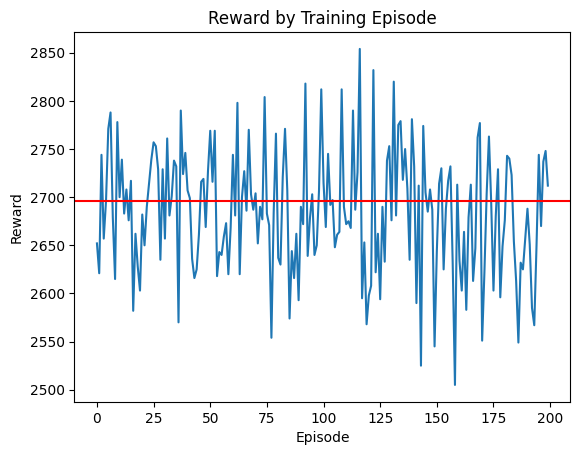

In [14]:
plt.title("Reward by Training Episode")
plt.xlabel("Episode")
plt.ylabel("Reward")
plt.plot(ending_ep_rewards)
plt.axhline(y=2695.57, color='r', linestyle='-')
plt.show()

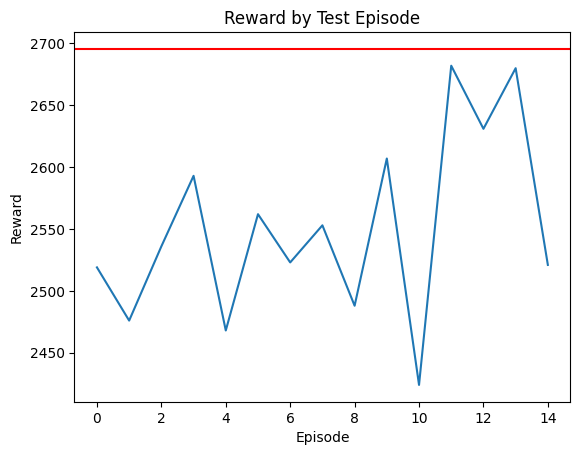

In [15]:
plt.figure()
plt.title("Reward by Test Episode")
plt.xlabel("Episode")
plt.ylabel("Reward")
plt.plot([stat['total_reward'] for stat in test_stats])
plt.axhline(y=2695.57, color='r', linestyle='-')
plt.show()

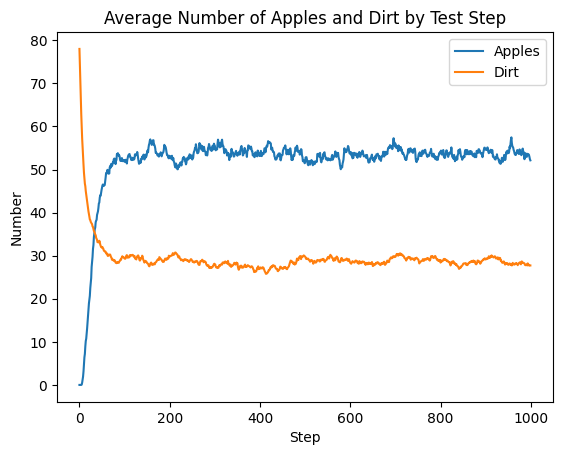

In [16]:
plt.figure()
plt.title("Average Number of Apples and Dirt by Test Step")
plt.xlabel("Step")
plt.ylabel("Number")
avg_num_apples = []
avg_num_dirt = []
for i in range(max_steps_per_episode):
    avg_num_apples.append(np.mean([stat['num_apples'][i] for stat in test_stats]))
    avg_num_dirt.append(np.mean([stat['num_dirt'][i] for stat in test_stats]))
plt.plot(avg_num_apples, label="Apples")
plt.plot(avg_num_dirt, label="Dirt")
plt.legend()
plt.show()

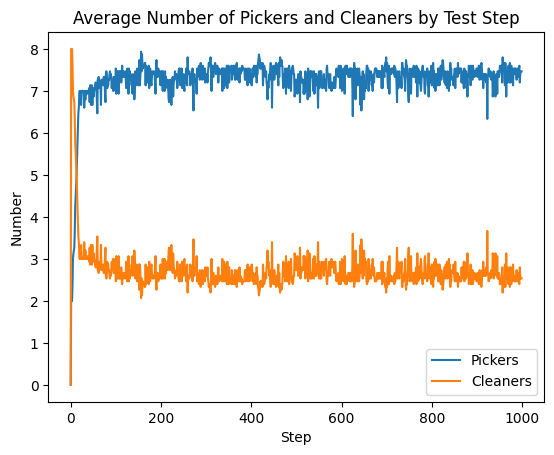

In [17]:
plt.figure()
plt.title("Average Number of Pickers and Cleaners by Test Step")
plt.xlabel("Step")
plt.ylabel("Number")
avg_num_pickers = []
avg_num_cleaners = []
for i in range(max_steps_per_episode):
    avg_num_pickers.append(np.mean([stat['pickers'][i] for stat in test_stats]))
    avg_num_cleaners.append(np.mean([stat['cleaners'][i] for stat in test_stats]))
plt.plot(avg_num_pickers, label="Pickers")
plt.plot(avg_num_cleaners, label="Cleaners")
plt.legend()
plt.show()

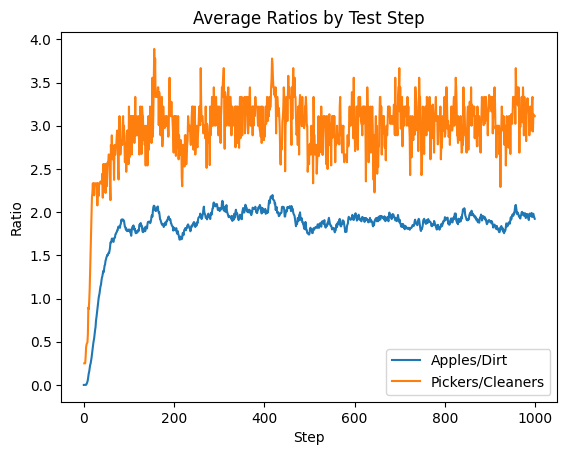

In [18]:
plt.figure()
plt.title("Average Ratios by Test Step")
plt.xlabel("Step")
plt.ylabel("Ratio")
avg_apple_dirt_ratios = []
apple_dirt_steps = []
avg_picker_cleaner_ratios = []
picker_cleaner_steps = []
for i in range(max_steps_per_episode):
    #avg_apple_dirt_ratios.append(np.mean([stat['num_apples'][i] / (stat['num_dirt'][i] + 1e-8) for stat in test_stats]))
    #avg_picker_cleaner_ratios.append(np.mean([stat['pickers'][i] / (stat['cleaners'][i]) for stat in test_stats if stat['cleaners'][i] > 0]))
    apple_dirt = []
    picker_cleaner = []
    for stat in test_stats:
        if stat['num_dirt'][i] > 0:
            apple_dirt.append(stat['num_apples'][i] / stat['num_dirt'][i])
        if stat['cleaners'][i] > 0:
            picker_cleaner.append(stat['pickers'][i] / stat['cleaners'][i])
    if len(apple_dirt) > 0:
        avg_apple_dirt_ratios.append(np.mean(apple_dirt))
        apple_dirt_steps.append(i)
    if len(picker_cleaner) > 0:
        avg_picker_cleaner_ratios.append(np.mean(picker_cleaner))
        picker_cleaner_steps.append(i)

plt.plot(apple_dirt_steps, avg_apple_dirt_ratios, label="Apples/Dirt")
plt.plot(picker_cleaner_steps, avg_picker_cleaner_ratios, label="Pickers/Cleaners")
plt.legend()
plt.show()